In [ ]:
# Install required libraries
!pip install gymnasium matplotlib numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.1 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
grid = np.zeros((6,6)) #this is how you define a 4x4 grid
print(grid)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


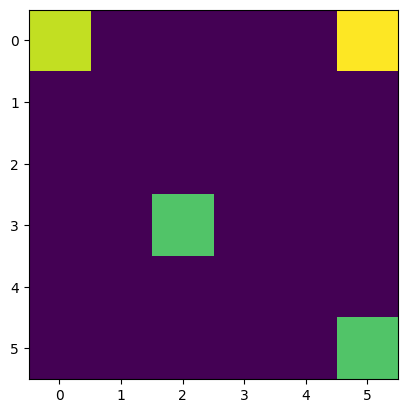

In [ ]:
pos1 = [0,0] #start position of agent 1
pos2 = [3,2] #goal position 1
pos3 = [5,5] #goal position 2
pos4 = [0,5] #start position of agent 2
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.8
grid[tuple(pos3)] = 0.8
grid[tuple(pos4)] = 1.1

plt.imshow(grid)

In [ ]:
# Definition of the Grid Environment class.


############################################
############################################
############################################
# TODO:
# Move around the rewards to better spots
# Block agents from moving into the same space
# Make each agent individually stop when reaching a goal
# Backup plan: if ambiguous goals don't work out, make each agent have a specific one of the two goals to reach

class GridEnvironment(gym.Env):
    # Attribute of a Gym class that provides info about the render modes
    metadata = { 'render.modes': [] }

    # Initialization function
    def __init__(self):

      self.observation_space = spaces.Discrete(36)
      self.action_space = spaces.Discrete(4)
      self.max_timesteps = 100 # possibly make more than 30 since this grid is larger than the one in A2?

      self.timestep = 0
      self.agent1_pos = [0,0]
      self.agent2_pos = [0,5]
      self.reward1 = [2,4]
      self.reward2=[3,0]
      self.reward3=[2,1]
      self.reward4=[0,1]
      self.reward5=[2,2]
      self.reward6=[2,5]
      self.goal1_pos = [3, 2]
      self.goal2_pos = [5,5]
      self.state = np.zeros((6,6))
      self.state[tuple(self.goal1_pos)] = 1
      self.state[tuple(self.goal2_pos)] = 1
      self.state[tuple(self.reward1)] = 0.3
      self.state[tuple(self.reward2)] = 0.2
      self.state[tuple(self.reward3)] = -0.2
      self.state[tuple(self.reward4)] = -0.5
      self.state[tuple(self.reward5)] = 0.2
      self.state[tuple(self.reward6)] = -0.2
      self.state[tuple(self.agent1_pos)] = 2
      self.state[tuple(self.agent2_pos)] = 3
      self.reward1collected=False # initialize rewards as not collected
      self.reward2collected=False
      self.reward3collected=False
      self.reward4collected=False
      self.reward5collected=False
      self.reward6collected=False
      self.a1foundgoal=False # use these to stop agents from moving after they find a goal
      self.a2foundgoal=False

    # Reset function
    def reset(self, **kwargs):
      self.timestep = 0
      self.agent1_pos = [0,0]
      self.agent2_pos = [0,5]
      self.reward1 = [2,4]
      self.reward2=[3,0]
      self.reward3=[5,0]
      self.reward4=[0,1]
      self.reward5=[2,2]
      self.reward6=[2,5]
      self.goal1_pos = [3,2]
      self.goal2_pos = [5,5]
      self.state = np.zeros((6,6))
      self.state[tuple(self.goal1_pos)] = 1
      self.state[tuple(self.goal2_pos)] = 1
      self.state[tuple(self.reward1)] = 0.3
      self.state[tuple(self.reward2)] = 0.2
      self.state[tuple(self.reward3)] = -0.2
      self.state[tuple(self.reward4)] = -0.5
      self.state[tuple(self.reward5)] = 0.2
      self.state[tuple(self.reward6)] = -0.2
      self.state[tuple(self.agent1_pos)] = 2
      self.state[tuple(self.agent2_pos)] = 3
      self.reward1collected=False # initialize rewards as not collected
      self.reward2collected=False
      self.reward3collected=False
      self.reward4collected=False
      self.reward5collected=False
      self.reward6collected=False
      self.a1foundgoal=False
      self.a2foundgoal=False
      observation = self.state.flatten()


      info = {}

      return observation, info

    # Step function: Contains the implementation for what happens when an
    # agent takes a step in the environment.
    def step(self, action1, action2): # need separate actions for each agent

      # save the current positions of agents in case they try to move into the same spot
      current_pos1 = np.array(self.agent1_pos)
      current_pos2 = np.array(self.agent2_pos)

      if self.a1foundgoal==False: # only allow an agent to move if they haven't reached a goal state
        if action1 == 0: #down
          self.agent1_pos[0] += 1
        if action1 == 1: #up
          self.agent1_pos[0] -= 1
        if action1 == 2: #right
          self.agent1_pos[1] += 1
        if action1 == 3: #left
          self.agent1_pos[1] -= 1
      if self.a2foundgoal==False:
        if action2 == 0: #down
          self.agent2_pos[0] += 1
        if action2 == 1: #up
          self.agent2_pos[0] -= 1
        if action2 == 2: #right
          self.agent2_pos[1] += 1
        if action2 == 3: #left
          self.agent2_pos[1] -= 1

      # revert back if they would end up in the same state
      # essentially this means they wouldn't move if they end up in the same state
      if np.array_equal(self.agent1_pos, self.agent2_pos):
        self.agent1_pos = current_pos1
        self.agent2_pos = current_pos2

      # Comment this to demonstrate the truncation condition.
      self.agent1_pos = np.clip(self.agent1_pos, 0, 5)
      self.agent2_pos = np.clip(self.agent2_pos, 0, 5)

      self.state = np.zeros((6,6))
      self.state[tuple(self.goal1_pos)] = 1
      self.state[tuple(self.goal2_pos)] = 1
      self.state[tuple(self.reward1)] = 0.3
      self.state[tuple(self.reward2)] = 0.2
      self.state[tuple(self.reward3)] = -0.2
      self.state[tuple(self.reward4)] = -0.5
      self.state[tuple(self.reward5)] = 0.2
      self.state[tuple(self.reward6)] = -0.2
      self.state[tuple(self.agent1_pos)] = 2
      self.state[tuple(self.agent2_pos)] = 3
      observation = self.state.flatten()

      reward1 = 0
      reward2 = 0 # separate rewards for each agent
      if (np.array_equal(self.agent1_pos, self.goal1_pos) or np.array_equal(self.agent1_pos, self.goal2_pos)) and self.a1foundgoal==False: # agent 1 finding either goal
        reward1 += 10
        self.a1foundgoal=True # mark that agent 1 reached a goal so it can't move anymore
      if (np.array_equal(self.agent2_pos,self.goal1_pos) or np.array_equal(self.agent2_pos,self.goal2_pos)) and self.a2foundgoal==False: # agent 2 finding either goal
        reward2 += 10
        self.a2foundgoal=True # mark that agent 2 reached a goal
      if np.array_equal(self.agent1_pos, self.reward1) and self.reward1collected==False: # agent 1 finding reward 1
        reward1 += 3
        self.reward1collected=True
        self.state[tuple(self.reward1)] = 0
      if np.array_equal(self.agent2_pos, self.reward1) and self.reward1collected==False: # agent 2 finding reward 1
        reward2 += 3
        self.reward1collected=True
        self.state[tuple(self.reward1)] = 0
      if np.array_equal(self.agent1_pos, self.reward2) and self.reward2collected==False: # agent 1 finding reward 2
        reward1 += 1
        self.reward2collected=True
        self.state[tuple(self.reward2)] = 0
      if np.array_equal(self.agent2_pos, self.reward2) and self.reward2collected==False: # agent 2 finding reward 2
        reward2 += 1
        self.reward2collected=True
        self.state[tuple(self.reward2)] = 0
      if np.array_equal(self.agent1_pos, self.reward3) and self.reward3collected==False: # agent 1 finding reward 3
        reward1 -= 1
        self.reward3collected=True
        self.state[tuple(self.reward3)] = 0
      if np.array_equal(self.agent2_pos, self.reward3) and self.reward3collected==False: # agent 2 finding reward 3
        reward2 -= 1
        self.reward3collected=True
        self.state[tuple(self.reward3)] = 0
      if np.array_equal(self.agent1_pos, self.reward4) and self.reward4collected==False: # agent 1 finding reward 4
        reward1 -= 5
        self.reward4collected=True
        self.state[tuple(self.reward4)] = 0
      if np.array_equal(self.agent2_pos, self.reward4) and self.reward4collected==False: # agent 2 finding reward 4
        reward2 -= 5
        self.reward4collected=True
        self.state[tuple(self.reward4)] = 0
      if np.array_equal(self.agent1_pos,self.reward5) and self.reward5collected==False: # agent 1 finding reward 5
        reward1 += 2
        self.reward5collected=True
        self.state[tuple(self.reward5)]=0
      if np.array_equal(self.agent2_pos,self.reward5) and self.reward5collected==False: # agent 2 finding reward 5
        reward2 += 2
        self.reward5collected=True
        self.state[tuple(self.reward5)]=0
      if np.array_equal(self.agent1_pos,self.reward6) and self.reward6collected==False: # agent 1 finding reward 6
        reward1 -= 2
        self.reward6collected=True
        self.state[tuple(self.reward6)]=0
      if np.array_equal(self.agent2_pos,self.reward6) and self.reward6collected==False: # agent 2 finding reward 6
        reward2 -= 2
        self.reward6collected=True
        self.state[tuple(self.reward6)]=0

      # set rewards as collected if the agent lands on them


      self.timestep += 1

      # Condition to check for termination (episode is over)
      # both agents need to find a reward
      # timesteps or (a1 finds g1 and a2 finds g2) or (a1 finds g2 and a2 finds g1)
      terminated = True if self.timestep >= self.max_timesteps or ((self.agent1_pos[0] == self.goal1_pos[0] and self.agent1_pos[1] == self.goal1_pos[1]) and \
                                                                   (self.agent2_pos[0] == self.goal2_pos[0] and self.agent2_pos[1] == self.goal2_pos[1])) or \
                                                                   ((self.agent1_pos[0] == self.goal2_pos[0] and self.agent1_pos[1] == self.goal2_pos[1]) and \
                                                                    (self.agent2_pos[0] == self.goal1_pos[0] and self.agent2_pos[1] == self.goal1_pos[1])) else False

      # Condition to check if agent is traversing to a cell beyond the permitted cells
      # This helps the agent to learn how to behave in a safe and predictable manner
      truncated = True if np.all((self.agent1_pos <0 ) & (self.agent1_pos > 5)) or np.all((self.agent2_pos<0) & (self.agent2_pos>5)) else False
      ########
      ###########
      ########## not sure if truncated is correct or not yet

      info = {}

      return observation, reward1, reward2, terminated, truncated, info

    # Render function: Visualizes the environment
    def render(self):
      # Add labels with tile numbers and colors
      for row in range(0,6):
        for col in range(0,6):
          state_number = row*6+col+1
          if row==self.agent1_pos[0] and col==self.agent1_pos[1]:
                tile_color = 'blue'
          elif row==self.agent2_pos[0] and col==self.agent2_pos[1]:
                tile_color = '#00FFFF'
          elif state_number == 2 and self.reward4collected==False:
                tile_color = 'red'
          elif state_number == 17 and self.reward1collected==False:
                tile_color = '#ADFF2F'
          elif state_number == 19 and self.reward2collected==False:
                tile_color = '#00CD00'
          elif state_number == 31 and self.reward3collected==False:
                tile_color = '#FF4500'
          elif state_number == 15 and self.reward5collected==False:
                tile_color = '#73FF88'
          elif state_number == 18 and self.reward6collected==False:
                tile_color = '#FF6666'
          elif state_number == 21: # goal 1
                tile_color = 'green'
          elif state_number == 36: # goal 2
                tile_color = 'green'
          else:
                tile_color = 'purple'

          plt.fill_between([col, col + 1], 5 - row, 6 - row, color=tile_color)
          plt.text(col + 0.5, 5.5 - row, str(state_number), color='black', ha='center', va='center',fontsize=10)
      plt.title('Grid Environment')
      plt.imshow(self.state,origin='upper',extent=[0,6,0,6])
      plt.show()

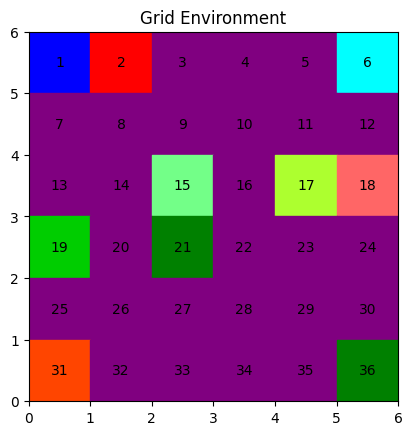

In [ ]:
env = GridEnvironment()

terminated, truncated = False, False
obs, info = env.reset()
env.render()

In [ ]:
# # Definition an agent that takes action randomly
class RandomAgent:

  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    """Takes a step in the environment by choosing an action randomly.

    Args:
        obs: The current observation.

    Returns:
        The action to take.
    """
    return np.random.choice(self.action_space.n)

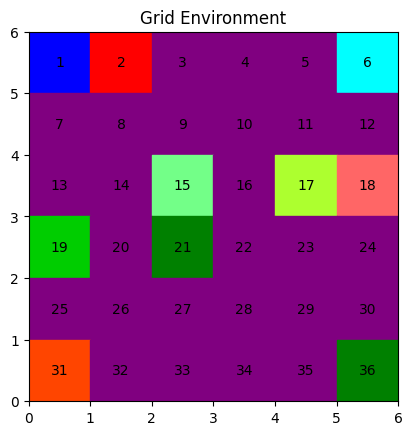

Action 1: 2 Action 2: 1 Reward 1: -5 Reward 2: 0 Done: False


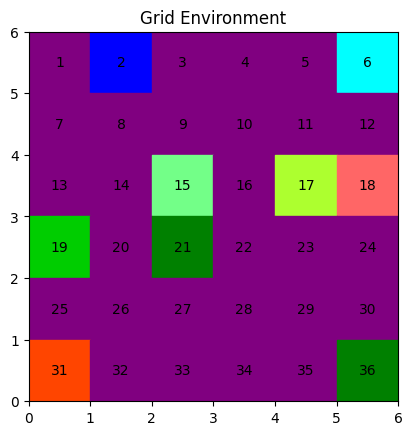

Action 1: 0 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


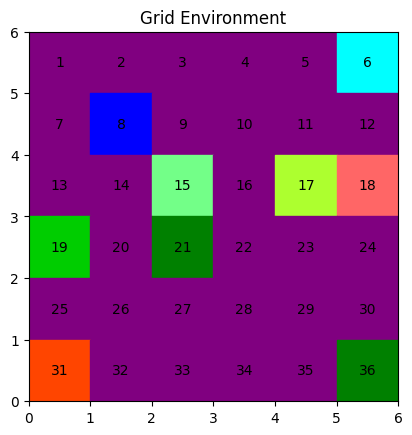

Action 1: 1 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


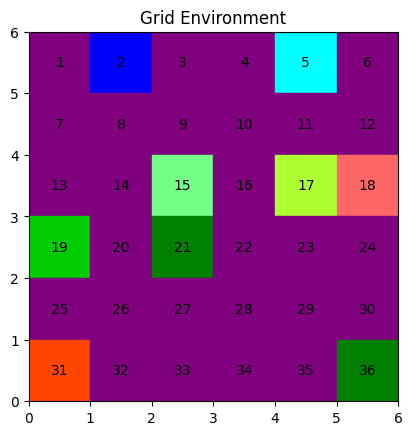

Action 1: 1 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


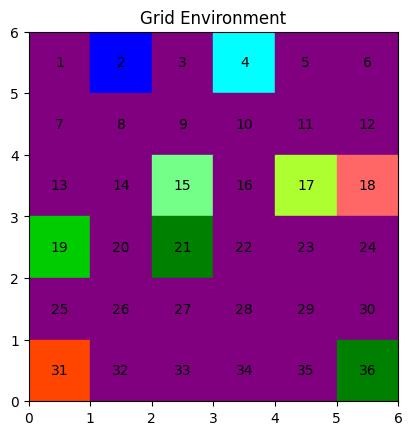

Action 1: 3 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


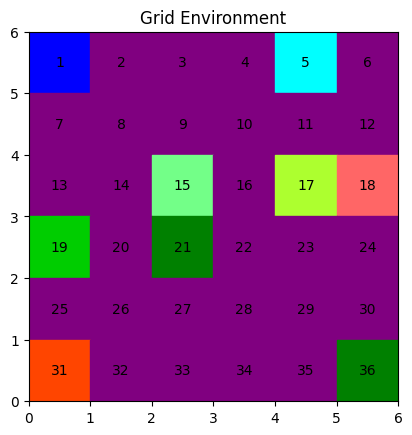

Action 1: 1 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


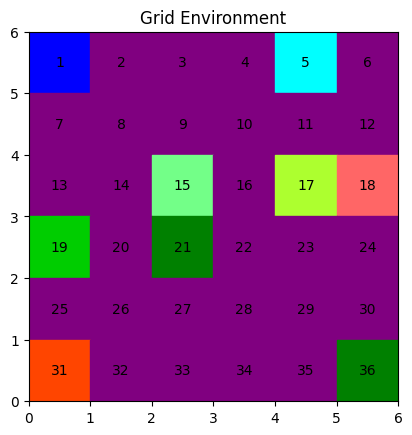

Action 1: 0 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


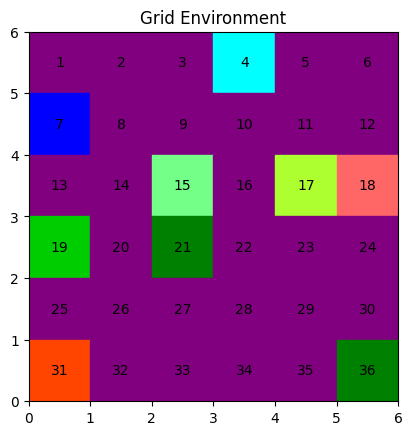

Action 1: 0 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


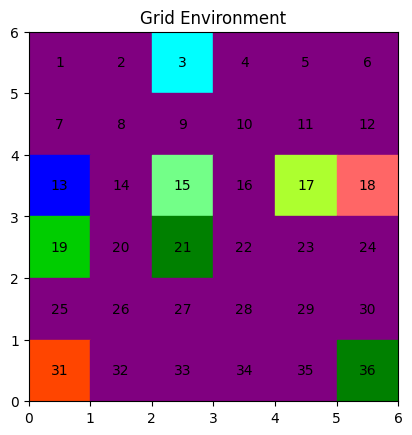

Action 1: 0 Action 2: 0 Reward 1: 1 Reward 2: 0 Done: False


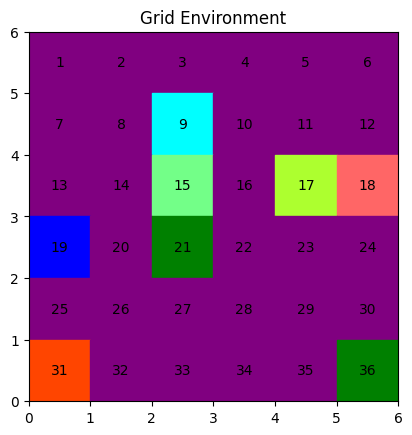

Action 1: 2 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


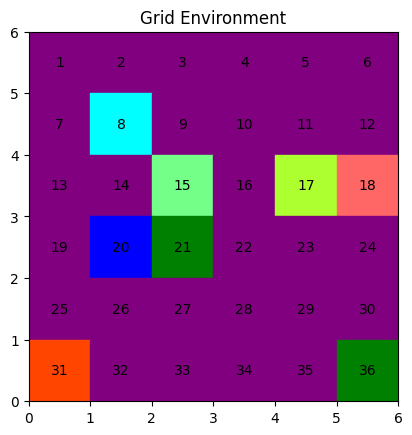

Action 1: 1 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


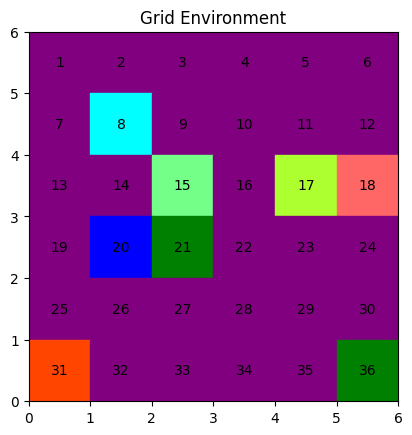

Action 1: 3 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


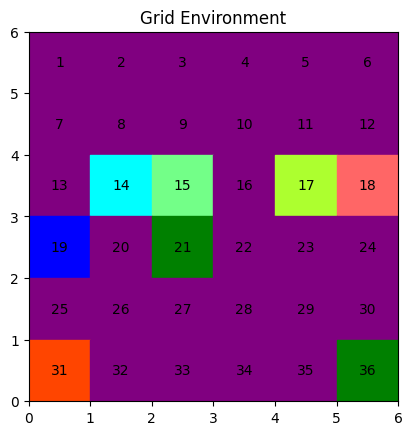

Action 1: 3 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


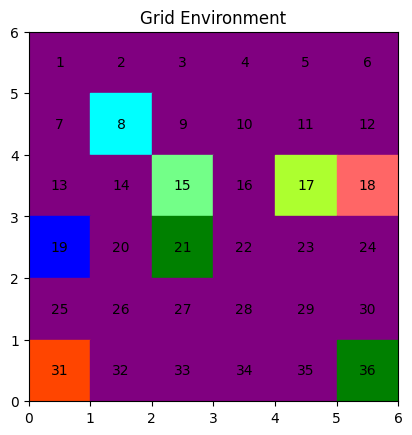

Action 1: 1 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


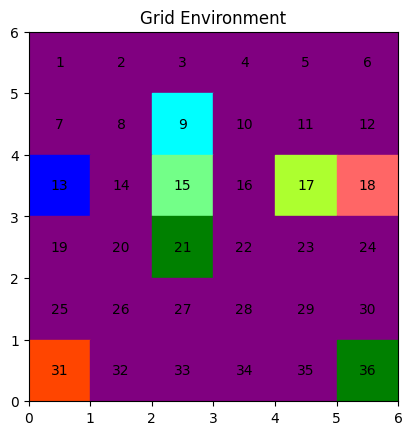

Action 1: 2 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


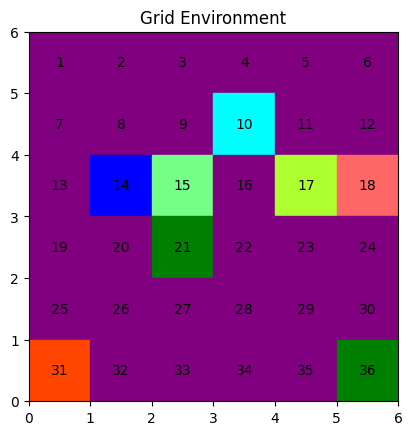

Action 1: 0 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


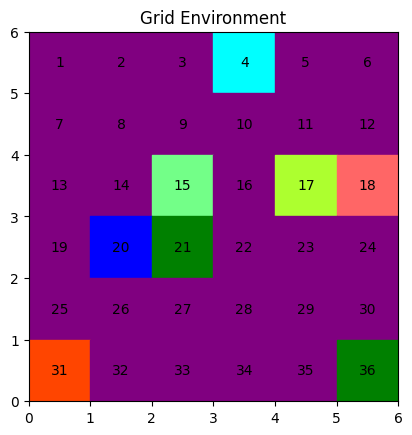

Action 1: 0 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


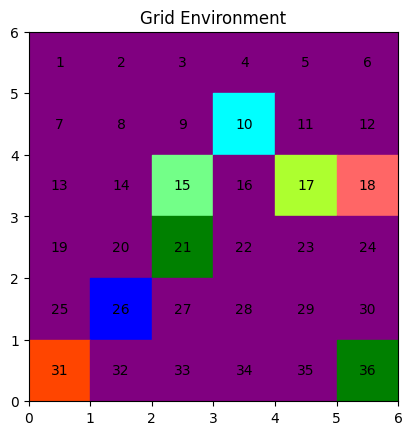

Action 1: 3 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


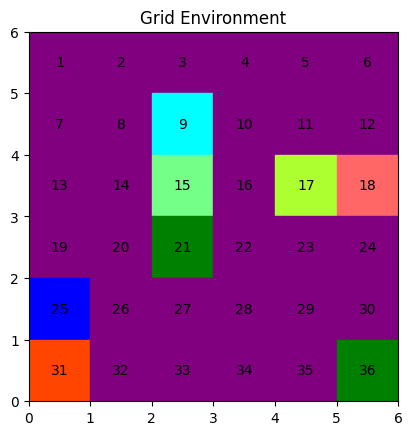

Action 1: 2 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


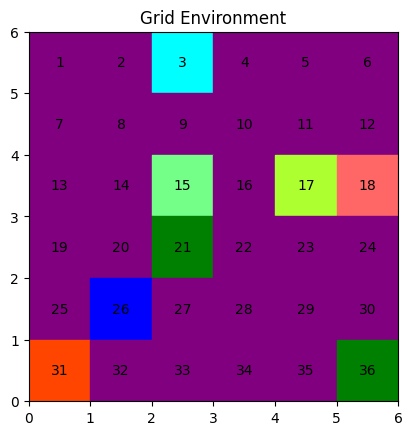

Action 1: 3 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


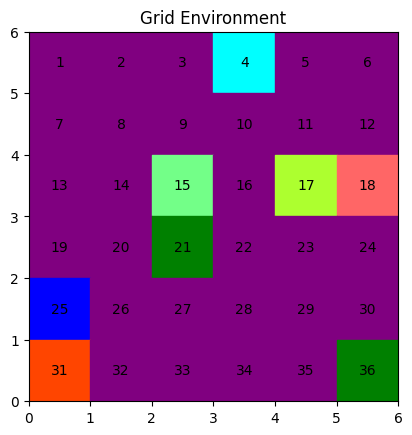

Action 1: 0 Action 2: 3 Reward 1: -1 Reward 2: 0 Done: False


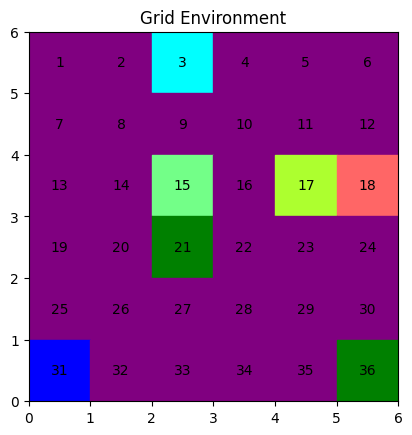

Action 1: 1 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


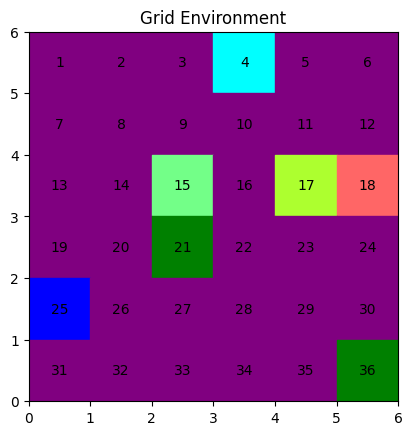

Action 1: 3 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


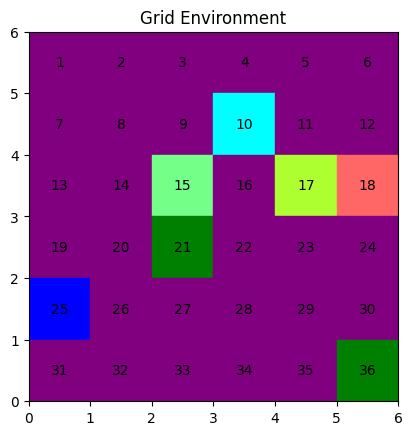

Action 1: 3 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


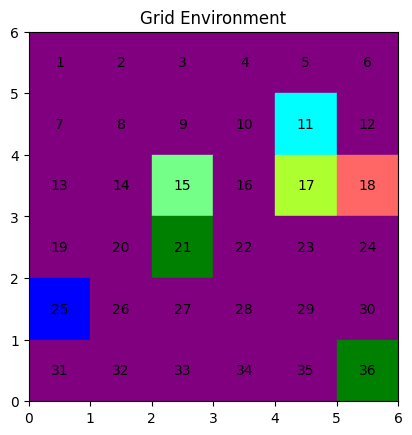

Action 1: 0 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


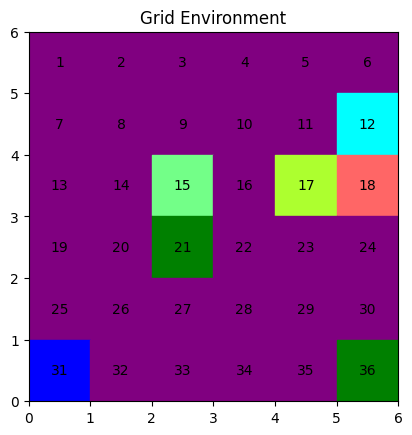

Action 1: 2 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


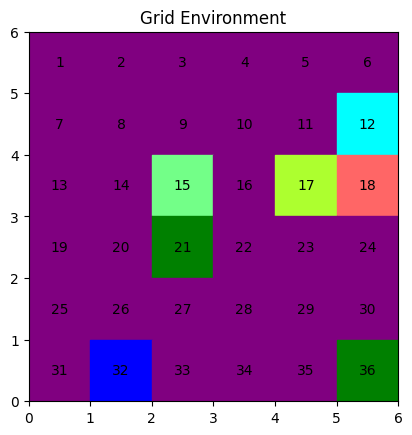

Action 1: 3 Action 2: 0 Reward 1: 0 Reward 2: -2 Done: False


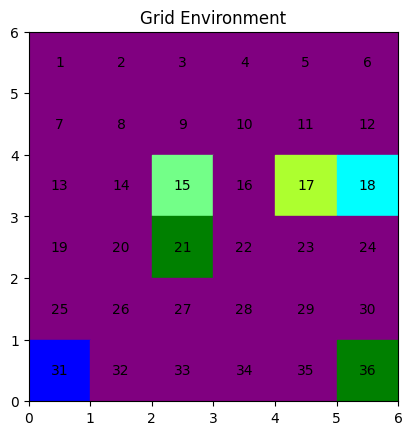

Action 1: 3 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


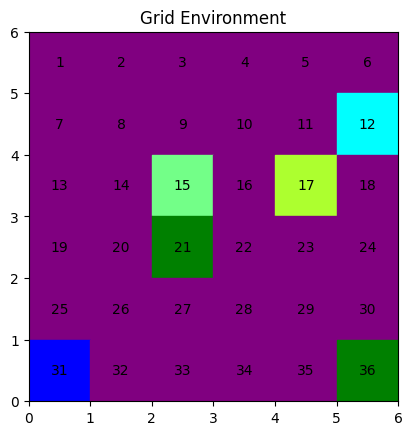

Action 1: 0 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


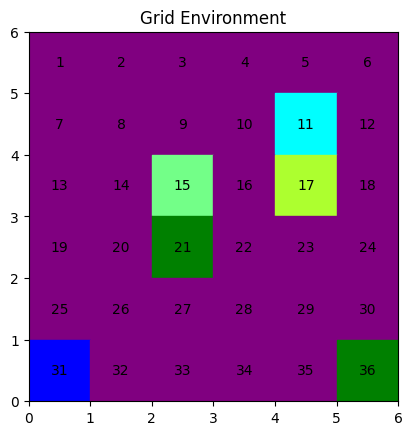

Action 1: 0 Action 2: 0 Reward 1: 0 Reward 2: 3 Done: False


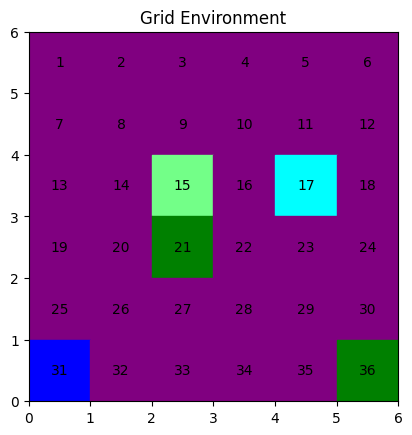

Action 1: 3 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


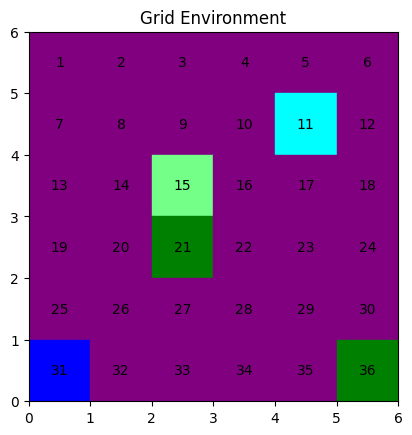

Action 1: 0 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


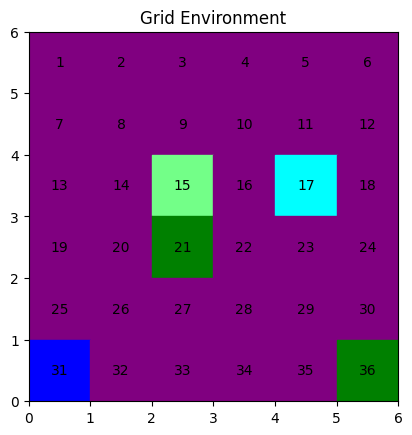

Action 1: 2 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


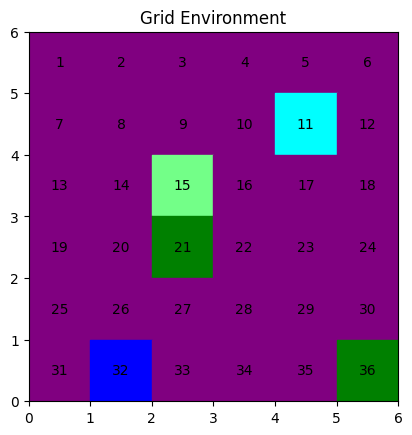

Action 1: 1 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


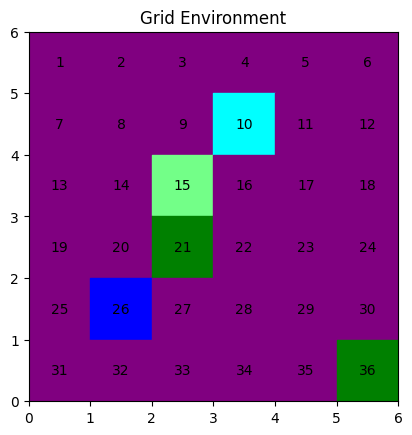

Action 1: 1 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


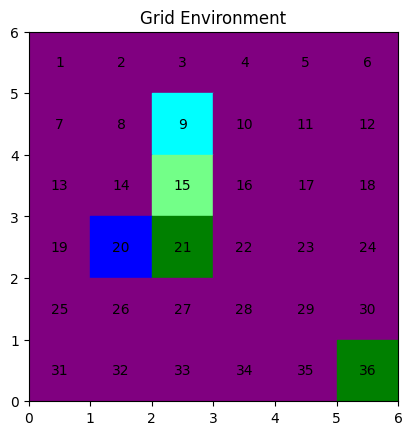

Action 1: 2 Action 2: 3 Reward 1: 10 Reward 2: 0 Done: False


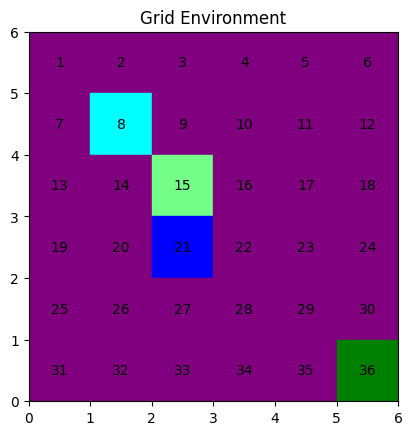

Action 1: 0 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


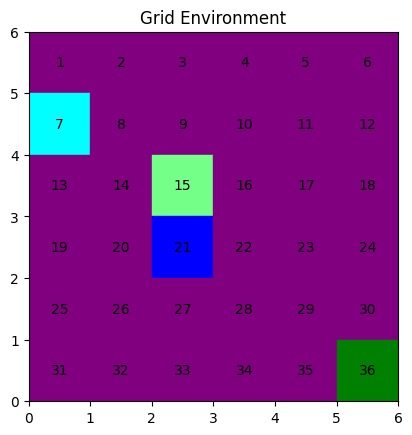

Action 1: 0 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


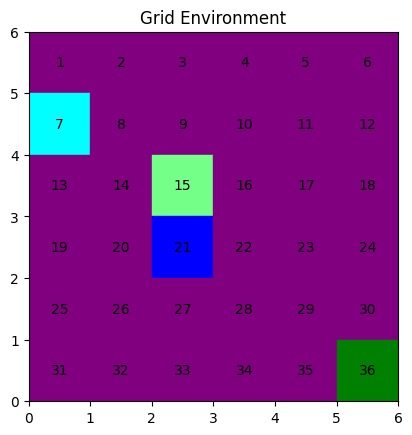

Action 1: 2 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


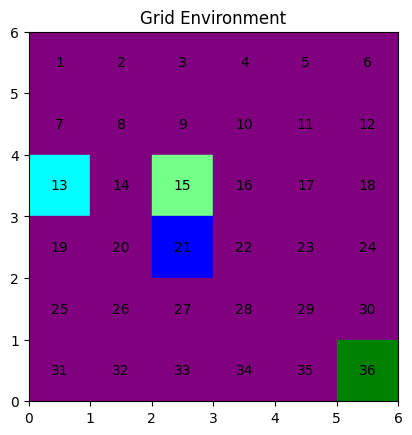

Action 1: 2 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


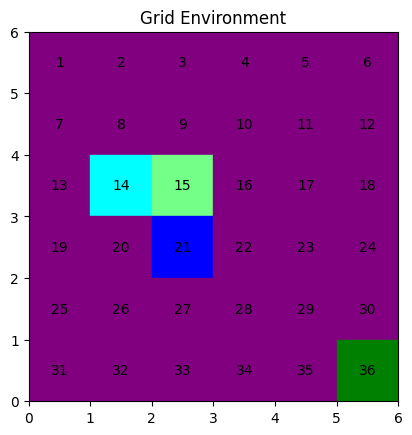

Action 1: 0 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


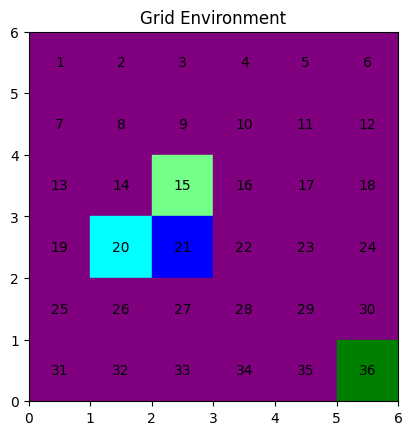

Action 1: 3 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


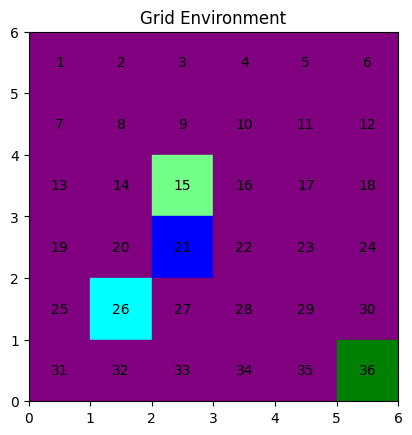

Action 1: 0 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


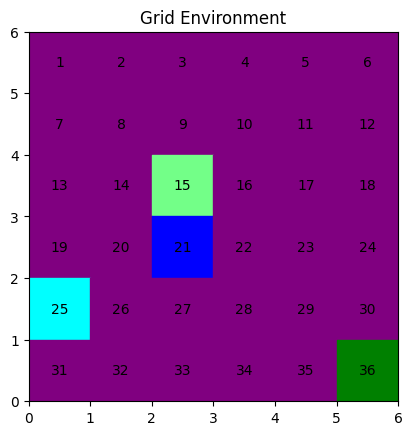

Action 1: 2 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


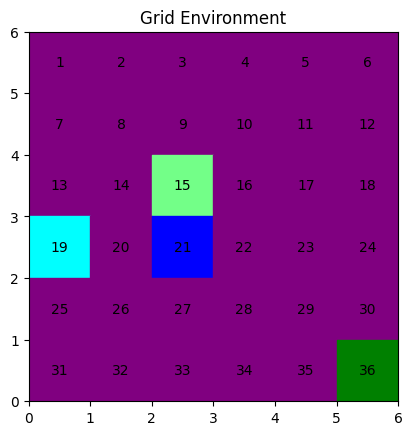

Action 1: 0 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


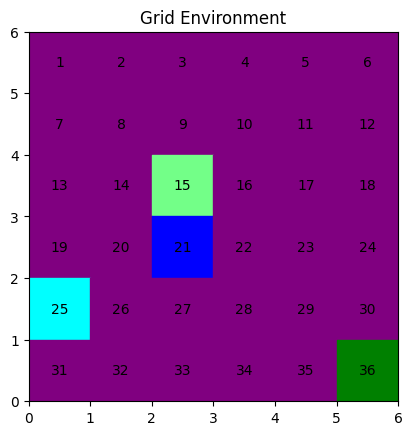

Action 1: 2 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


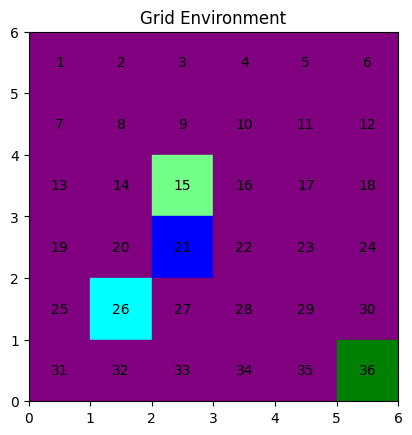

Action 1: 1 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


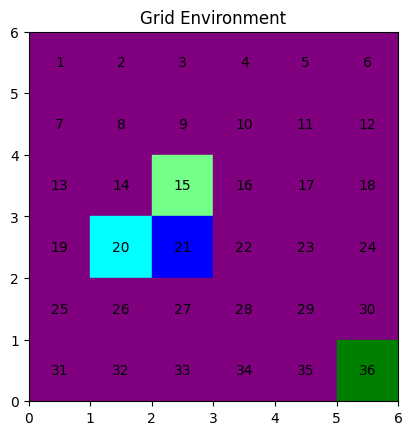

Action 1: 3 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


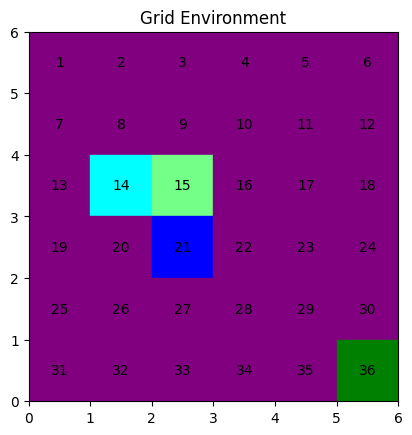

Action 1: 1 Action 2: 2 Reward 1: 0 Reward 2: 2 Done: False


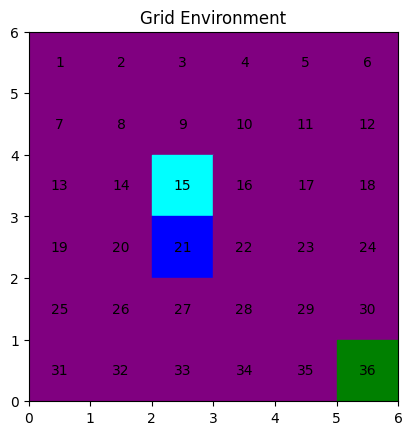

Action 1: 2 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


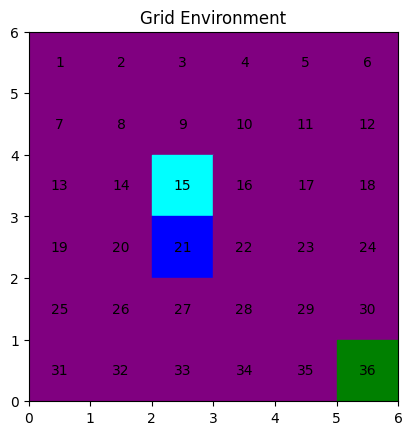

Action 1: 3 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


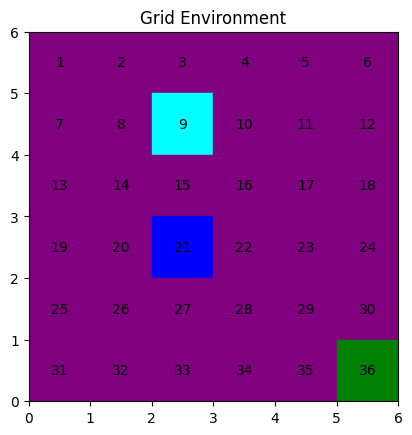

Action 1: 3 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


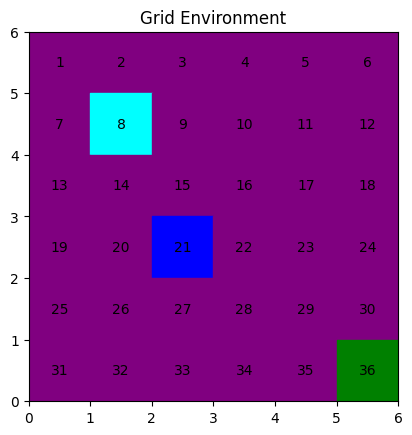

Action 1: 1 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


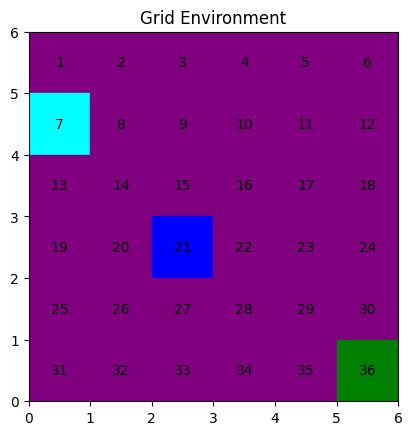

Action 1: 1 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


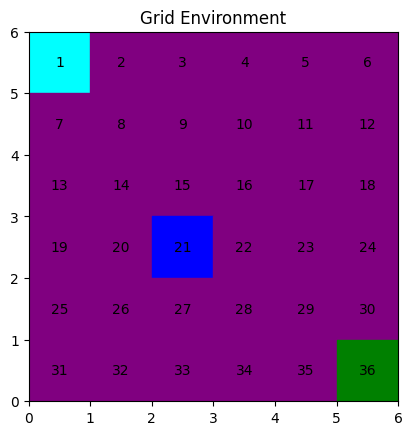

Action 1: 1 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


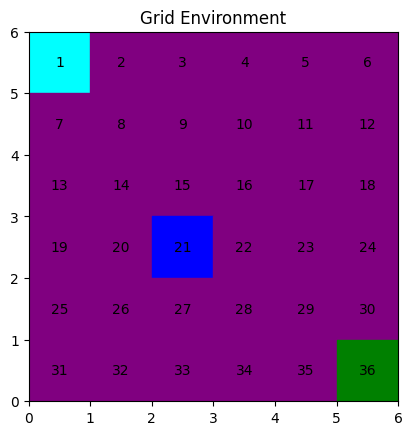

Action 1: 0 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


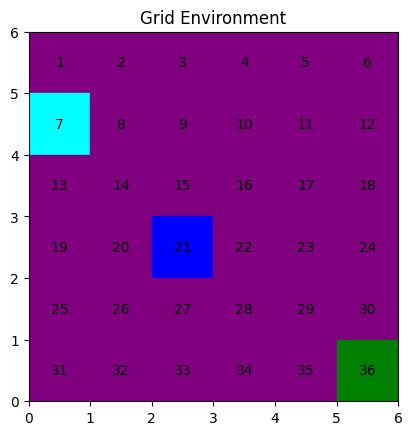

Action 1: 0 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


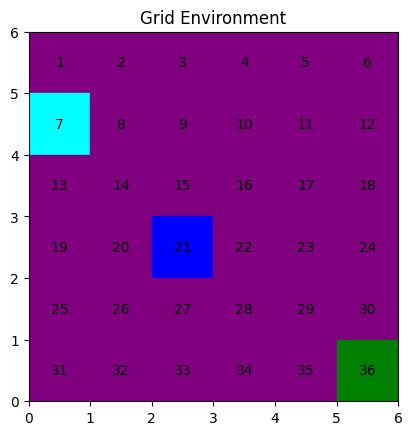

Action 1: 0 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


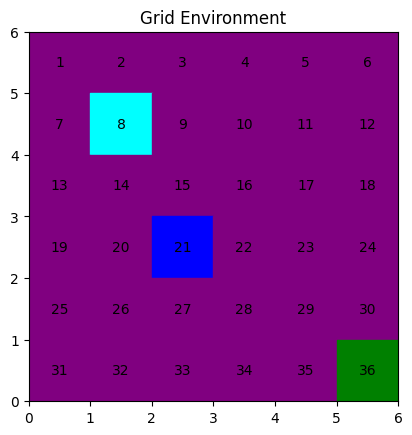

Action 1: 3 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


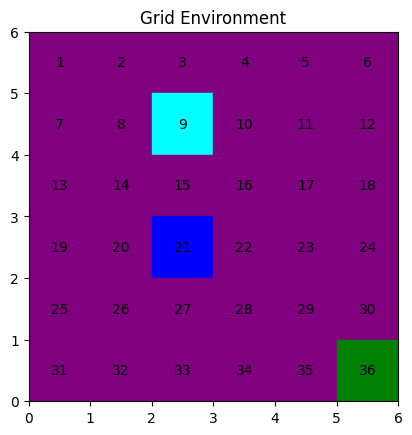

Action 1: 1 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


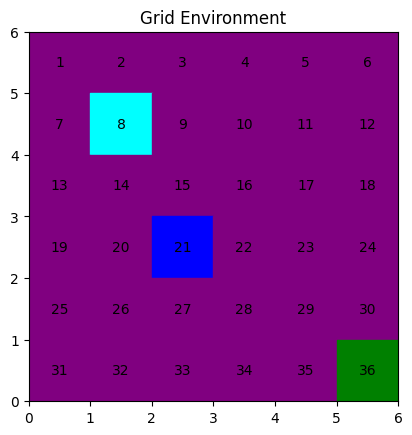

Action 1: 3 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


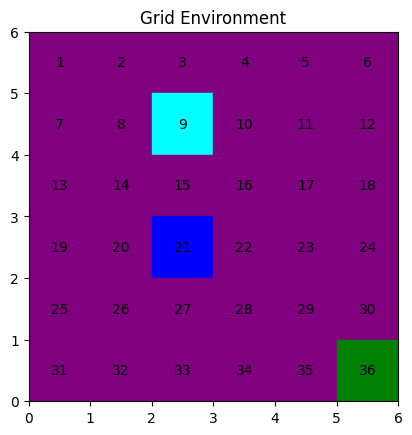

Action 1: 2 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


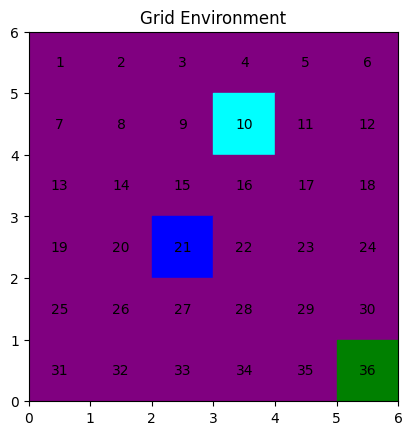

Action 1: 0 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


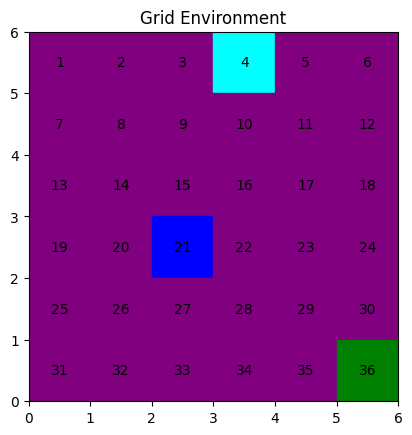

Action 1: 2 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


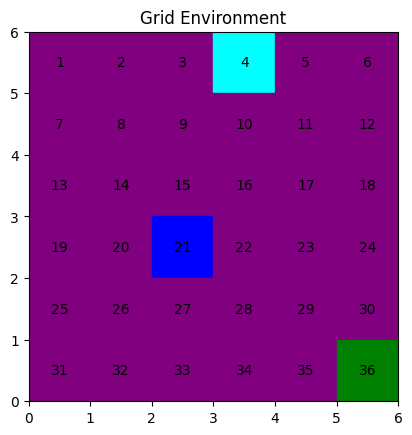

Action 1: 1 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


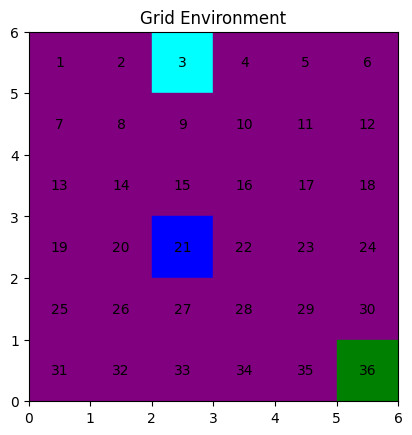

Action 1: 3 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


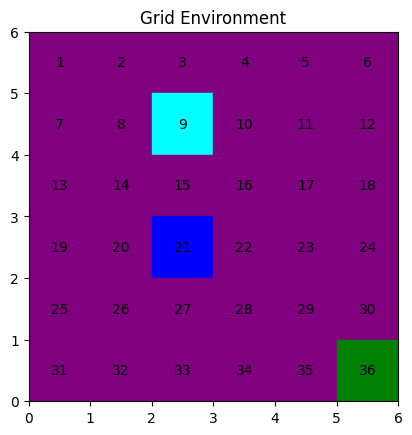

Action 1: 3 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


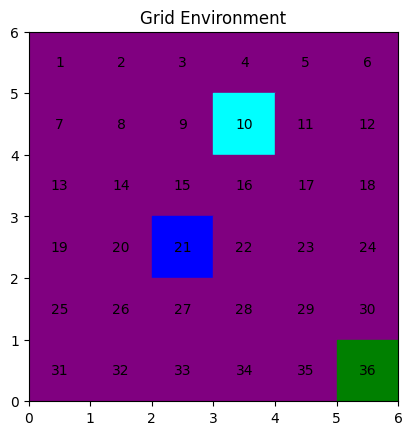

Action 1: 0 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


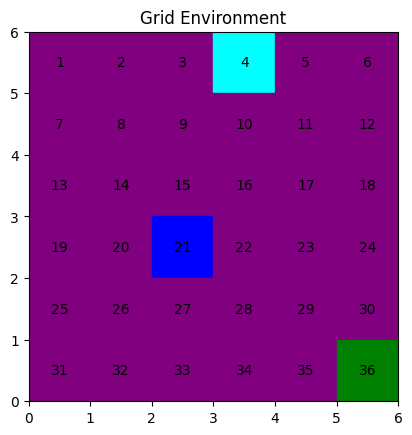

Action 1: 0 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


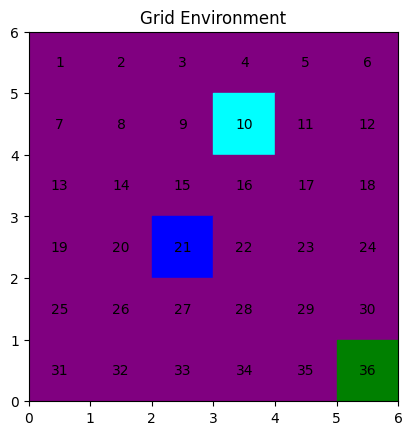

Action 1: 3 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


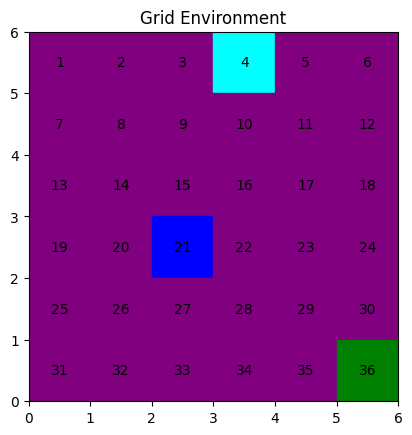

Action 1: 1 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


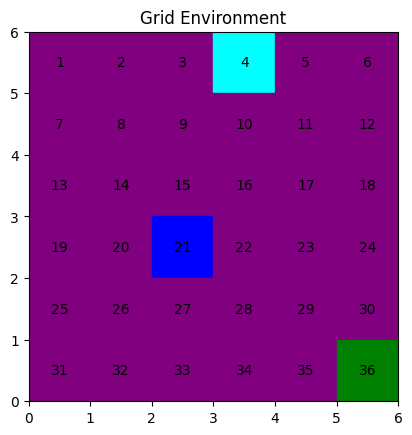

Action 1: 3 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


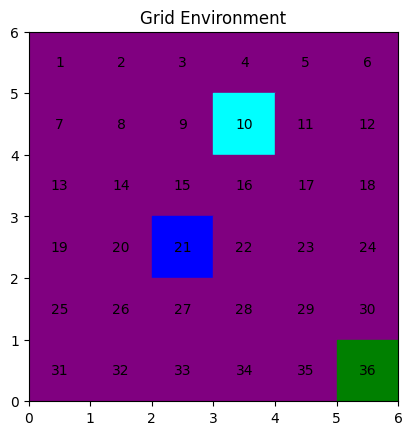

Action 1: 0 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


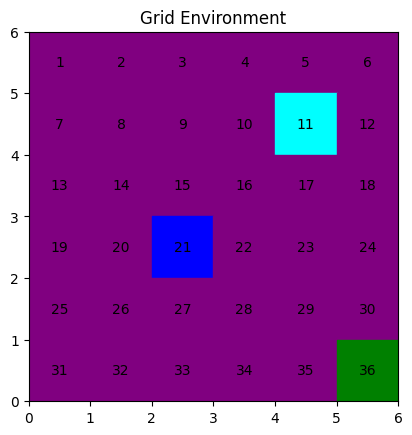

Action 1: 3 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


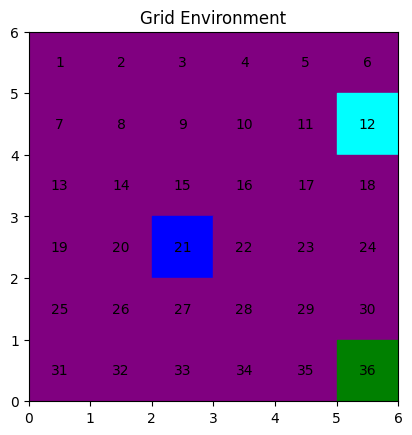

Action 1: 3 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


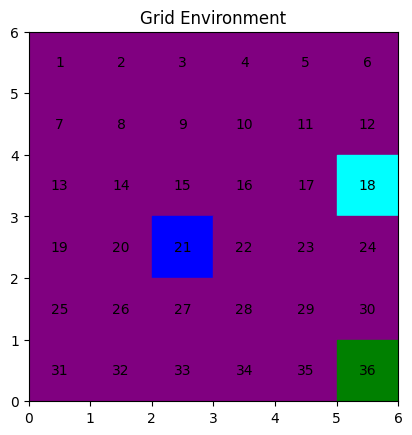

Action 1: 2 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


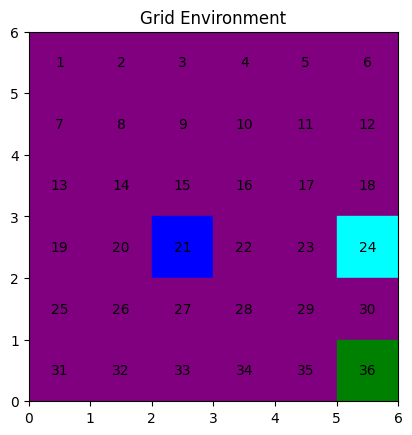

Action 1: 0 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


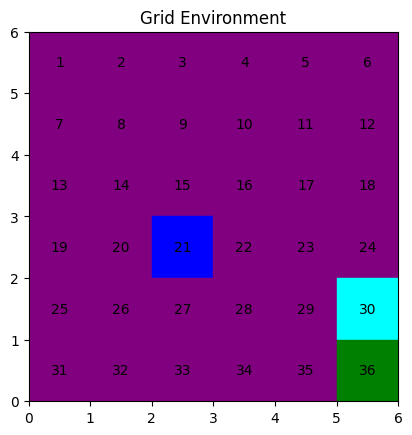

Action 1: 1 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


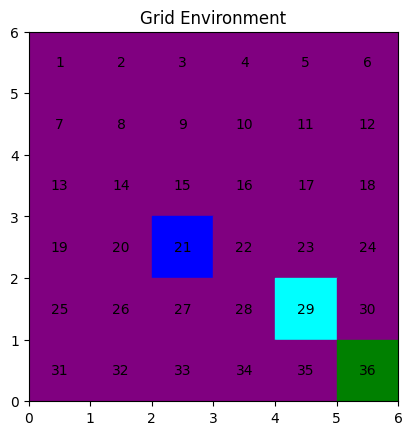

Action 1: 2 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


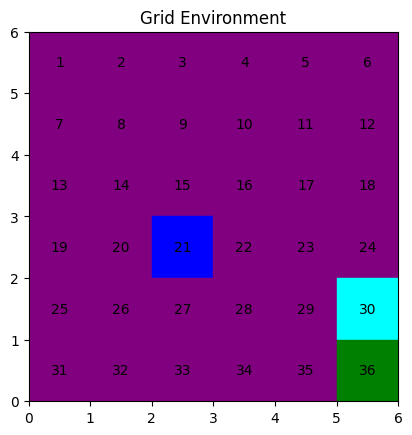

Action 1: 0 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


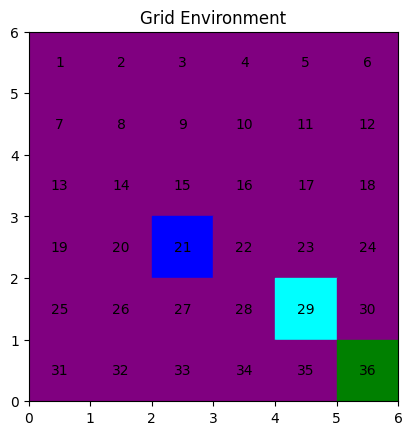

Action 1: 1 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


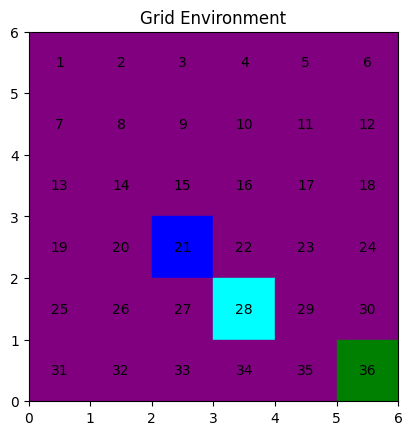

Action 1: 0 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


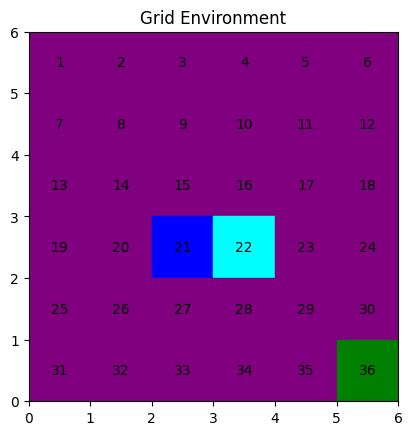

Action 1: 0 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


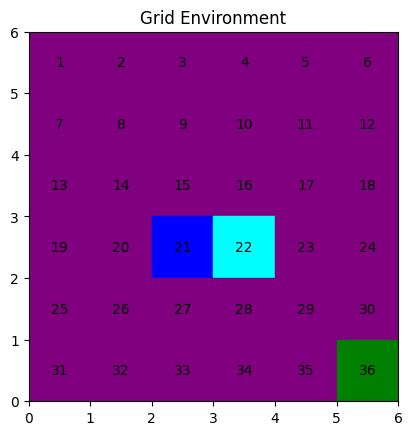

Action 1: 0 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


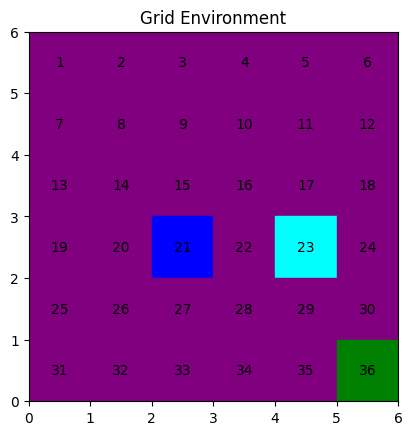

Action 1: 0 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


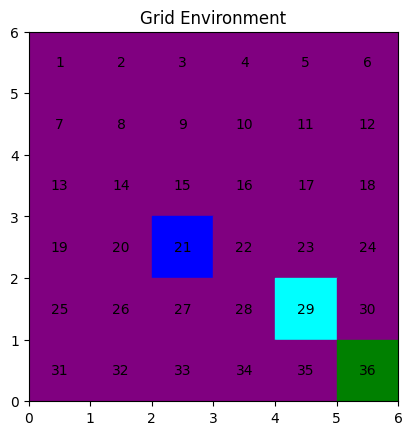

Action 1: 3 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


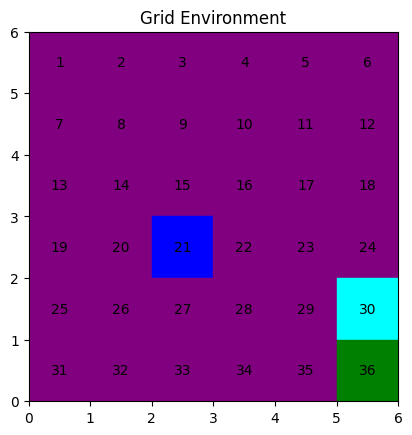

Action 1: 3 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


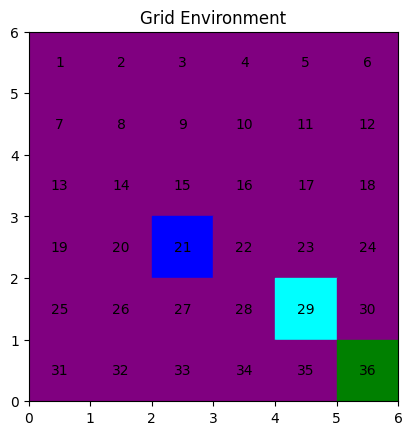

Action 1: 1 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


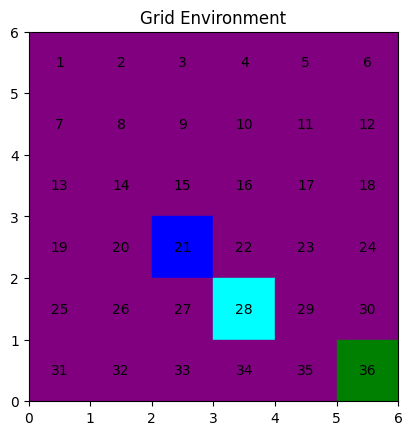

Action 1: 2 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


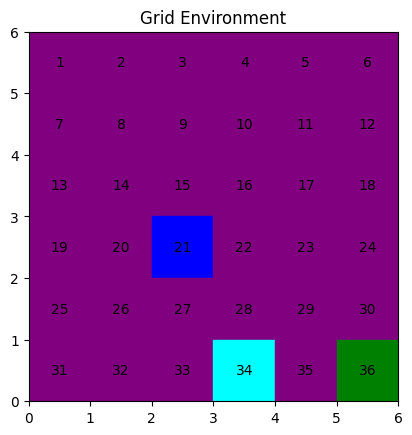

Action 1: 0 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


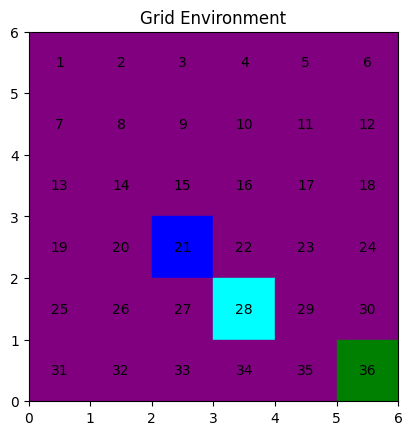

Action 1: 0 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


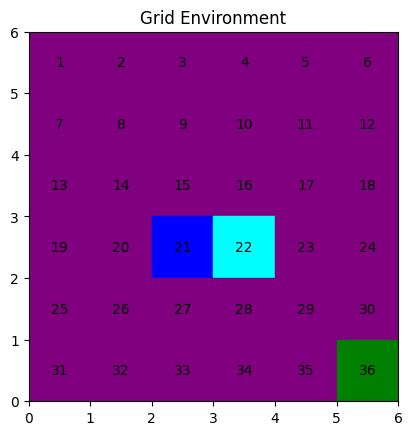

Action 1: 0 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


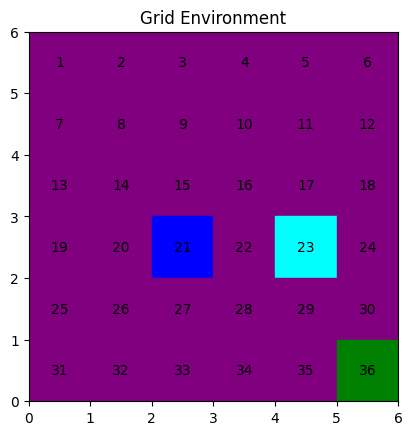

Action 1: 3 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: False


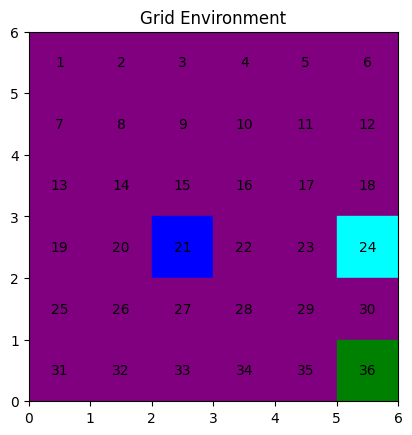

Action 1: 0 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


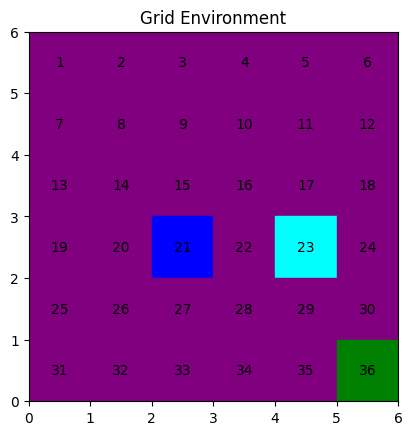

Action 1: 3 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


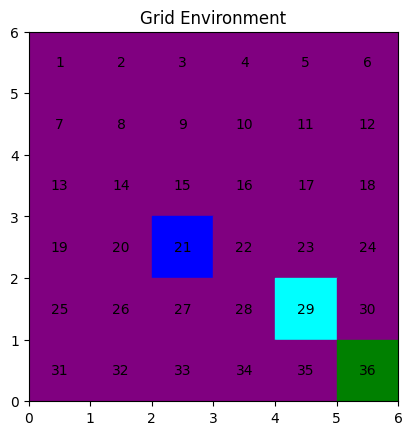

Action 1: 2 Action 2: 1 Reward 1: 0 Reward 2: 0 Done: False


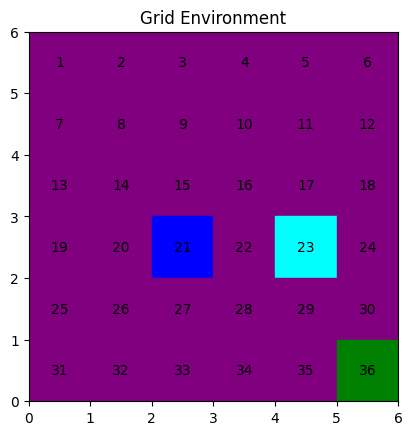

Action 1: 0 Action 2: 0 Reward 1: 0 Reward 2: 0 Done: False


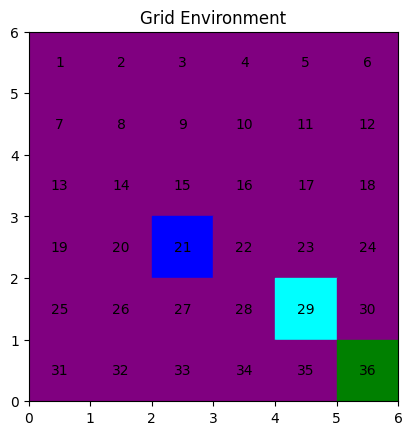

Action 1: 2 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


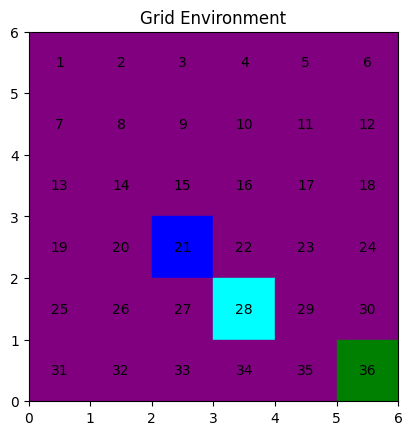

Action 1: 0 Action 2: 3 Reward 1: 0 Reward 2: 0 Done: False


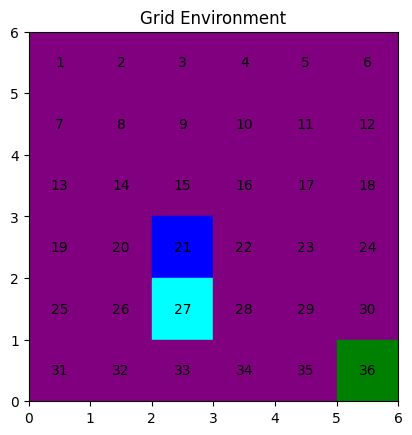

Action 1: 1 Action 2: 2 Reward 1: 0 Reward 2: 0 Done: True


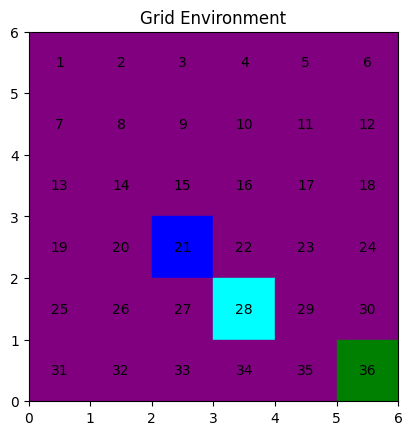

In [ ]:
# Sample code for environment and agent implementation. Also shows
# visualization of the random agent's movement across the grid.

if __name__ == '__main__':
    env = GridEnvironment()
    agent1 = RandomAgent(env)
    agent2 = RandomAgent(env)

    obs, info = env.reset()
    terminated, truncated = False, False
    env.render()

    while not terminated:
        action1 = agent1.step(obs)
        action2 = agent2.step(obs)
        obs, reward1, reward2, terminated, truncated, info = env.step(action1,action2)
        print('Action 1:', action1, 'Action 2:', action2, 'Reward 1:', reward1, 'Reward 2:', reward2, 'Done:', terminated)
        env.render()

In [ ]:
############
############
############
# TODO:
# argmax isn't going to work all the time now because we have 2 agents labeled 2 and 3 in obs so we are going to need to find its specific identifier
# might need to make 2 different classes for agent, one for each that searches obs for its specific identifier?

class SarsaAgent1:
  def __init__(self,Q):
    self.Q=Q

  def step(self,obs):
    state = obs
    act=0
    # stateindex = np.argmax(state)
    stateindex=0
    for i in range(0,len(state)): # find what state number the agent is at
      if state[i] == 2: # find the index of 2, which is agent 1
        stateindex = i
        break
    act = np.argmax(self.Q[stateindex])
    # max = np.argmax(self.Q[stateindex]) # use the state number to get the maximum Q value from that row
    # for i in range(0,len(self.Q[stateindex])):
    #   if Q[stateindex][i]==max:
    #     act=i
    #     break

    return act # choose only the greedy action from the current state

In [ ]:
class SarsaAgent2:
  def __init__(self,Q):
    self.Q=Q

  def step(self,obs):
    state = obs
    act=0
    # stateindex = np.argmax(state)
    stateindex=0
    for i in range(0,len(state)): # find what state number the agent is at
      if state[i] == 3: # find the index of 3, which is agent 2
        stateindex = i
        break
    act = np.argmax(self.Q[stateindex])
    # max = np.argmax(self.Q[stateindex]) # use the state number to get the maximum Q value from that row
    # for i in range(0,len(self.Q[stateindex])):
    #   if Q[stateindex][i]==max:
    #     act=i
    #     break

    return act # choose only the greedy action from the current state

In [ ]:
def sarsa(a,g,e,num,env): # alpha, gamma, epsilon, number of episodes, environment
  # DO THIS TWICE ONCE FOR LEARNING AND ONCE FOR TESTING
  initialepsilon=e
  epsilon=e
  # print("initial epsilon: ",epsilon)
  Q1 = np.zeros((env.observation_space.n,env.action_space.n)) # need Q table for each agent?
  Q2 = np.zeros((env.observation_space.n,env.action_space.n))
  print("Initial Q Table For Agent 1:")
  print(Q1)
  print("Initial Q Table For Agent 2:")
  print(Q2)
  totalrewardsperepisode1=[] # use to keep track of the total reward for each episode
  totalrewardsperepisode2=[]
  epsilonovertime=[] # keep track of epsilon value to plot later
  epsilonovertime.append(initialepsilon)
  # initialize gamma value somewhere
  # alpha between 0.1-0.2
  for episode in range(0,num): # loop through 500-700 episodes
    # print("####")
    # print("####")
    # print("####")
    # print("####")
    # print("####")
    # print("####")
    # print("####")
    # print("####")
    # print("####")
    # print("training episode number: ",episode)
    totalreward1 = 0 # initialize the total reward to 0 for each episode
    totalreward2 = 0
    # learning phase takes random or greedy and testing only takes greedy
    obs, info = env.reset() # reset to the initial state for each episode?
    S=obs # current state
    # print("Initial state: ",S)
    # Sint = np.argmax(S)
    # print("Sint: ",Sint)
    #print(S)
    for i in range(0,len(S)): # find what state agent 1 is in
      if S[i] == 2:
        Sint1 = i
        break
    for i in range(0,len(S)): # find what state agent 2 is in
      if S[i]==3:
        Sint2=i
        break

    terminated,truncated=False,False
    if np.random.rand() < epsilon: # determine if we will choose a random action or a greedy action
        action1 = np.random.choice(env.action_space.n) # random action
        action2 = np.random.choice(env.action_space.n)
        # print("random action chosen: ",action)
    else:
      act1 = np.argmax(Q1[Sint1])
      act2 = np.argmax(Q2[Sint2])
      # print("greedy action taken: ",act)
      # max = np.argmax(Q[Sint])
      # #print("max: ",max)
      # for i in range(0,len(Q[Sint])):
      #   if Q[Sint][i]==max:
      #     act=i
      #     break
      action1 = act1 # greedy action based on the maximum Q value in the row for the current state
      action2 = act2
    # choose an action from the current state from the policy derived in Q (epsilon-greedy) (if epsilon value is greater)
    while not terminated:
      # print("Q[Sint][action]: ",Q[Sint][action])
      #print("Sint: ",Sint)
      #print("Current State: ",Sint)
      #print("Action: ",action)
      obs, reward1, reward2, terminated, truncated, info = env.step(action1,action2) # apply the actions
      totalreward1 += reward1
      totalreward2 += reward2
      # print("agent 1 reward: ",totalreward1)
      # print("agent 2 reward: ",totalreward2)
      # print("totalreward in loop: ", totalreward)
      nextS = obs
      # print("nextS obs: ",nextS)
      # nextSint = np.argmax(nextS)
      # print("nextSint index: ",nextSint)
      # nextSint=0
      for i in range(0,len(nextS)):
        if nextS[i] == 2: # find next state of agent 1
          nextSint1 = i
          break
      for i in range(0,len(nextS)):
        if nextS[i] == 3: # find next state of agent 2
          nextSint2 = i
          break
      #nextSint = nextS.index(np.argmax(nextS))
      #print("Next State: ",nextSint)
      #print(nextS)

      # now find the next action for the next state
      act1=0
      act2=0
      if np.random.rand() < epsilon: # determine if we will choose a random action or a greedy action
        nextaction1 = np.random.choice(env.action_space.n) # random action
        nextaction2 = np.random.choice(env.action_space.n)
        # print("nextaction random: ",nextaction)
      else:
        act1 = np.argmax(Q1[nextSint1])
        act2 = np.argmax(Q2[nextSint2])
        # print("greedy next action: ",act)
        # max = np.argmax(Q[nextSint])
        # #print("max: ",max)
        # for i in range(0,len(Q[nextSint])):
        #   if Q[nextSint][i]==max:
        #     act=i
        #     break
        nextaction1 = act1 # greedy action based on the maximum Q value in the row for the current state
        nextaction2 = act2
      #print("Next action: ",nextaction)

      #print("act: ",act)
      # print("reward: ",reward)
      # print("g:", g)
      # print("Q[nextSint][nextaction]: ",Q[nextSint][nextaction])
      Q1[Sint1][action1] = Q1[Sint1][action1] + a*(reward1 + g*Q1[nextSint1][nextaction1] - Q1[Sint1][action1]) # update the Q value with the SARSA equation
      Q2[Sint2][action2] = Q2[Sint2][action2] + a*(reward2 + g*Q2[nextSint2][nextaction2] - Q2[Sint2][action2])
      # print("Q[Sint][action] = Q[Sint][action] + a*(reward + g*Q[nextSint][nextaction] - Q[Sint][action])")
      # print("updated Q value: ",Q[Sint][action])
      # print("Current Q table: ",Q)
      S=nextS
      # print("S: ",S)
      # Sint = np.argmax(S)
      # print("Sint: ",Sint)
      for i in range(0,len(S)): # find what state agent 1 is in
        if S[i] == 2:
          Sint1 = i
          break
      for i in range(0,len(S)): # find what state agent 2 is in
        if S[i] == 3:
          Sint2 = i
          break
      action1=nextaction1
      action2=nextaction2
      # print("action=nextaction: ",action)
    totalrewardsperepisode1.append(totalreward1)
    totalrewardsperepisode2.append(totalreward2)
    # print("totalrewardspepisodelist: ",totalrewardsperepisode)
    #epsilon decay rate
    decayfactor = (0.01/initialepsilon)**(1/num)
    epsilon = epsilon*decayfactor
    # print("new epsilon: ",epsilon)
    epsilonovertime.append(epsilon)

  print("Trained Q Table For Agent 1:")
  print(Q1)
  print("Trained Q Table for Agent 2:")
  print(Q2)
  # plot total reward per episode
  plt.plot(totalrewardsperepisode1,label='Agent 1')
  plt.plot(totalrewardsperepisode2,label='Agent 2')
  plt.xlabel("Episode")
  plt.ylabel("Total Reward")
  plt.title("Total Reward per Episode")
  plt.show()

  # plot epsilon decay graph
  plt.plot(epsilonovertime)
  plt.xlabel("Episode")
  plt.ylabel("Epsilon Value")
  plt.title("Epsilon Decay")
  plt.show()

  return Q1,Q2

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

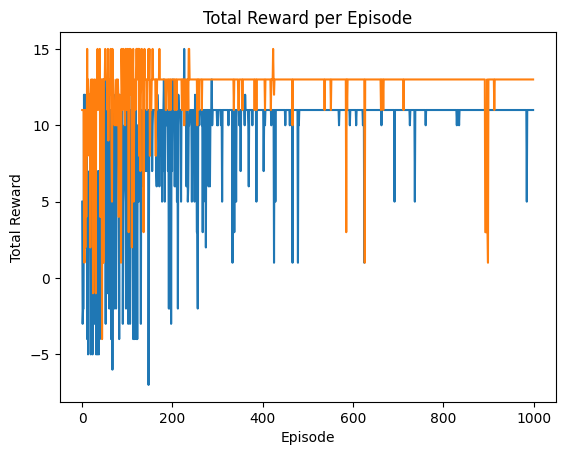

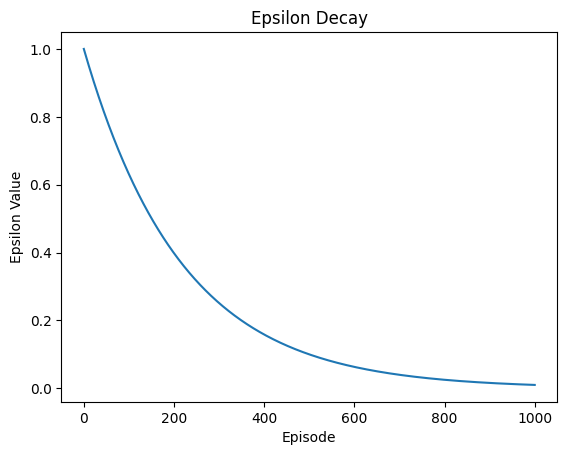

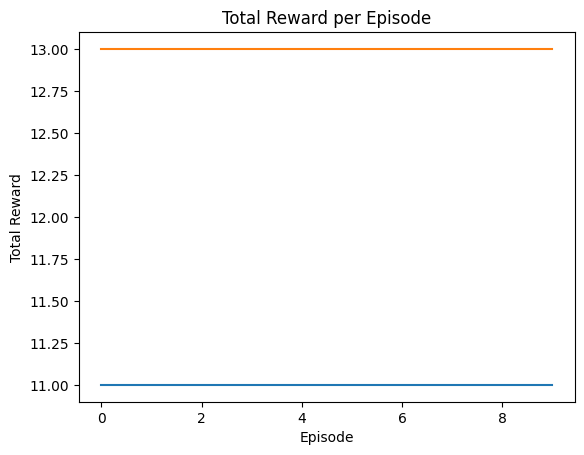

In [ ]:
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 1 # start training with 1, have it decay to about 0.01
    numepisodes = 1000

    Q1,Q2=sarsa(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

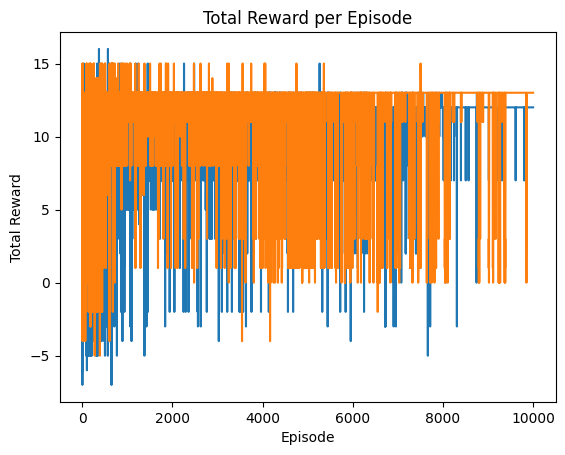

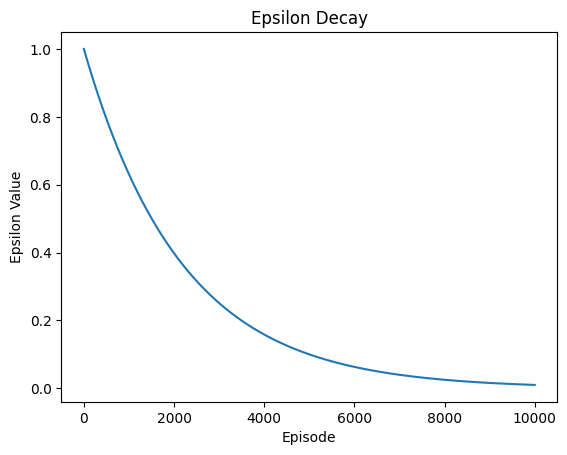

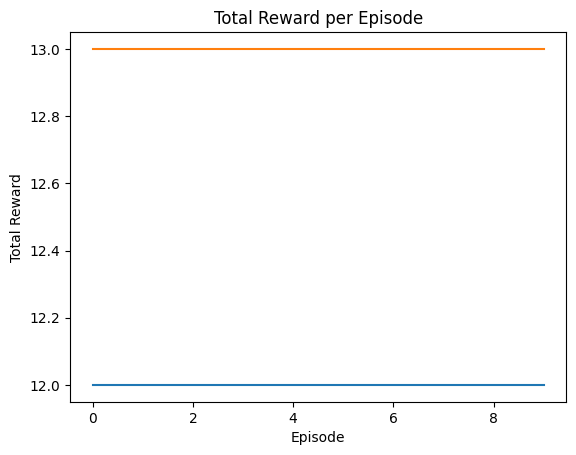

In [ ]:
# Hyperparameter 1: Number of episodes (make very large)
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 1 # start training with 1, have it decay to about 0.01
    numepisodes = 10000

    Q1,Q2=sarsa(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

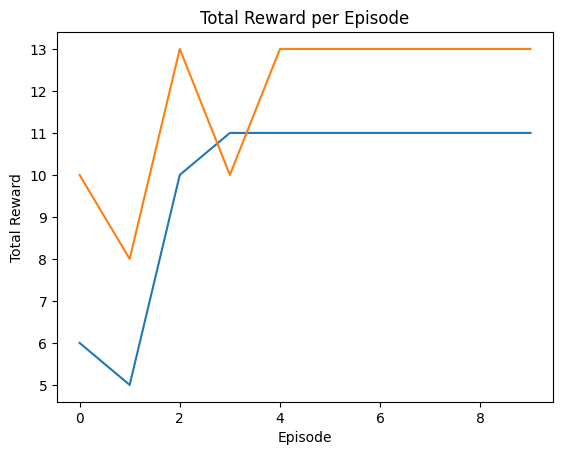

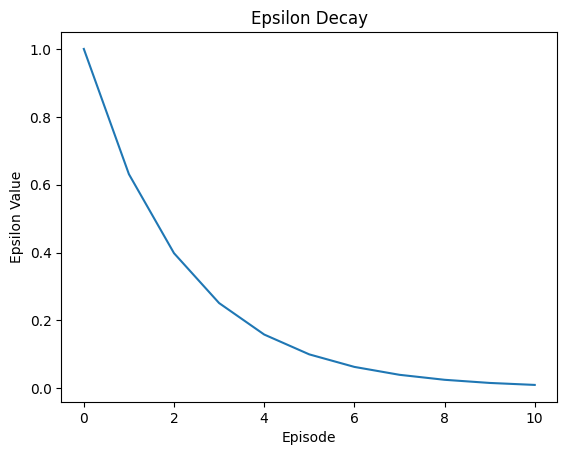

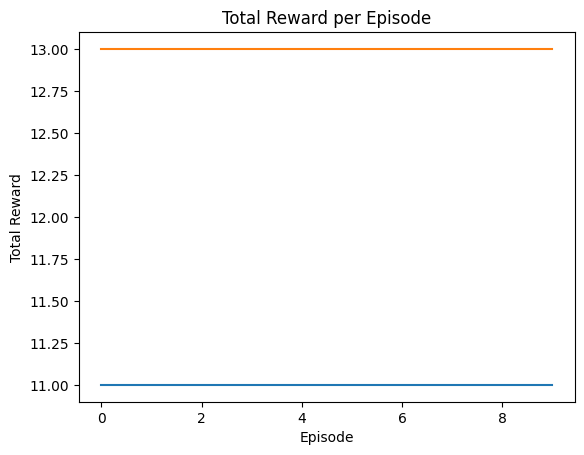

In [ ]:
# Hyperparameter 1: Number of episodes (make very small)
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 1 # start training with 1, have it decay to about 0.01
    numepisodes = 10

    Q1,Q2=sarsa(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

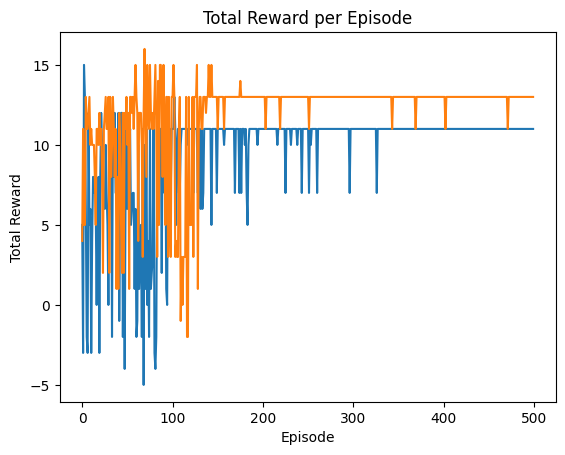

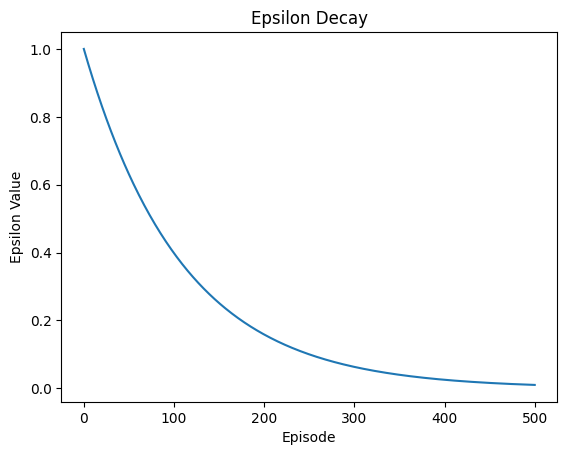

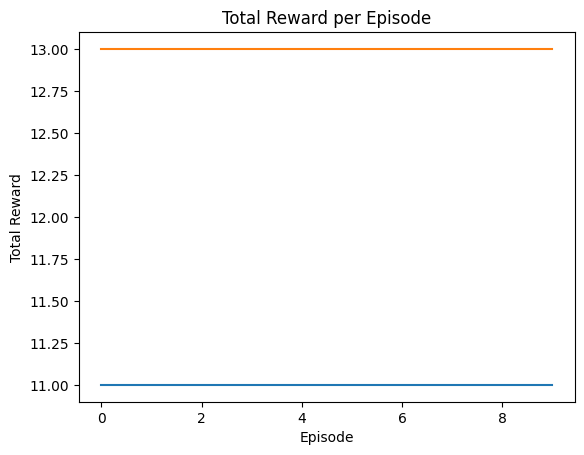

In [ ]:
# Hyperparameter 1: Number of episodes (half of original)
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 1 # start training with 1, have it decay to about 0.01
    numepisodes = 500

    Q1,Q2=sarsa(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

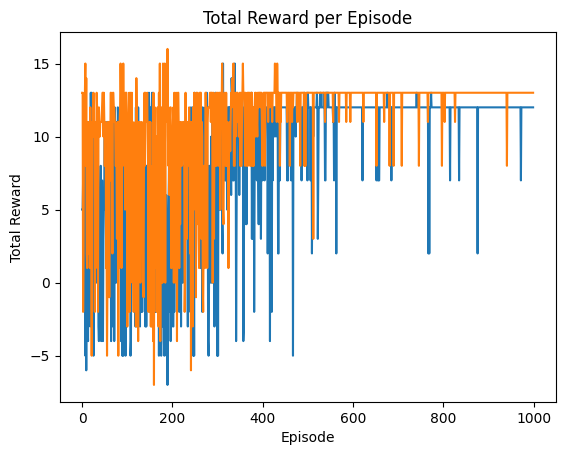

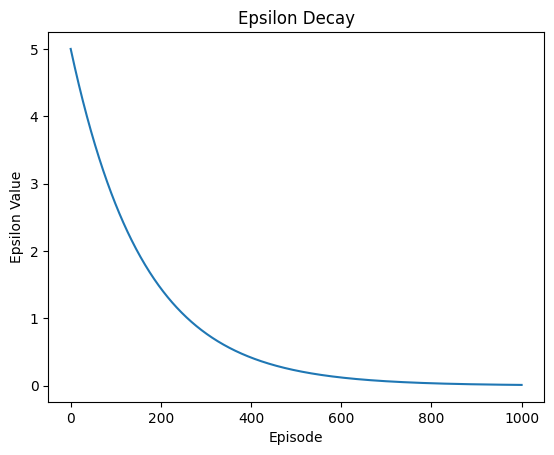

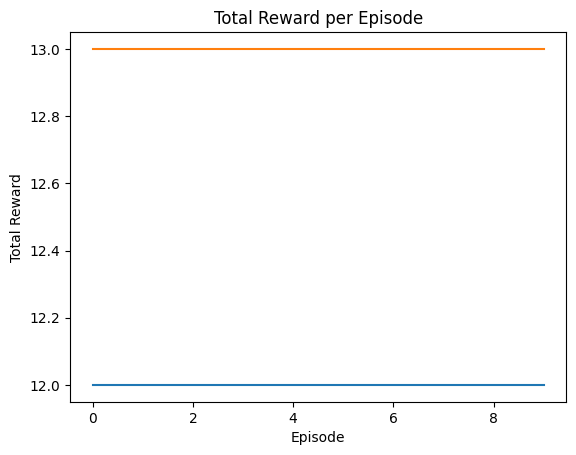

In [ ]:
# Hyperparameter 2: Epsilon value (make very large)
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 5 # start training with 1, have it decay to about 0.01
    numepisodes = 1000

    Q1,Q2=sarsa(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

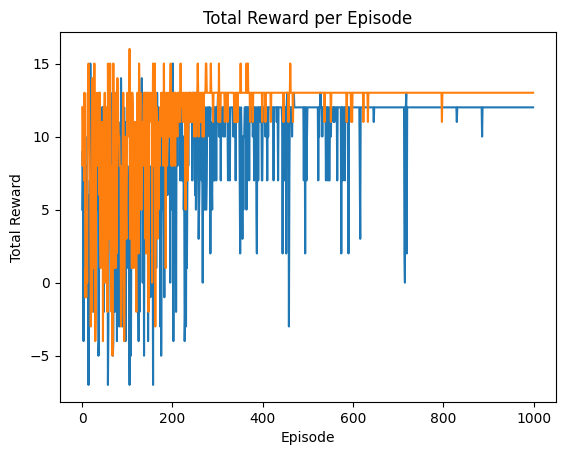

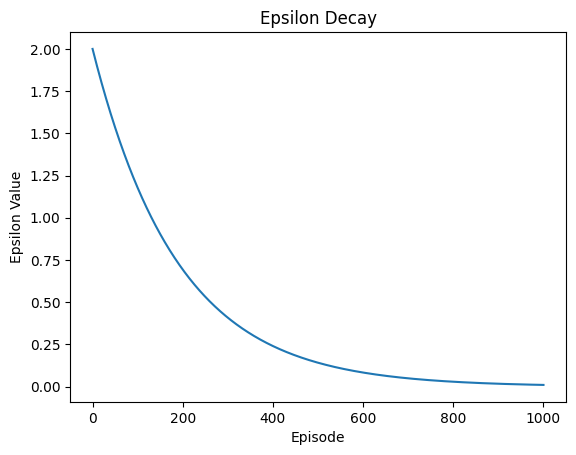

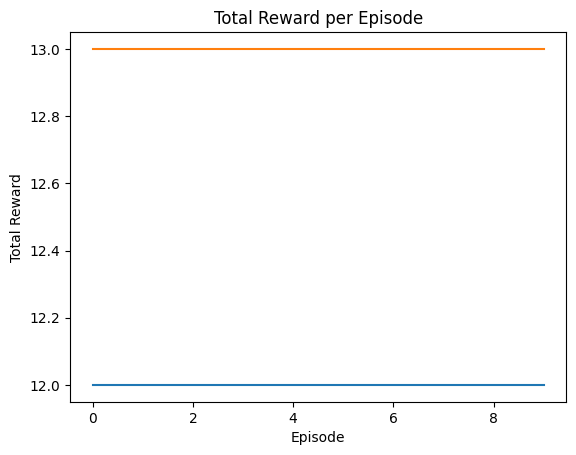

In [ ]:
# Hyperparameter 2: Epsilon value (double original)
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 2 # start training with 1, have it decay to about 0.01
    numepisodes = 1000

    Q1,Q2=sarsa(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

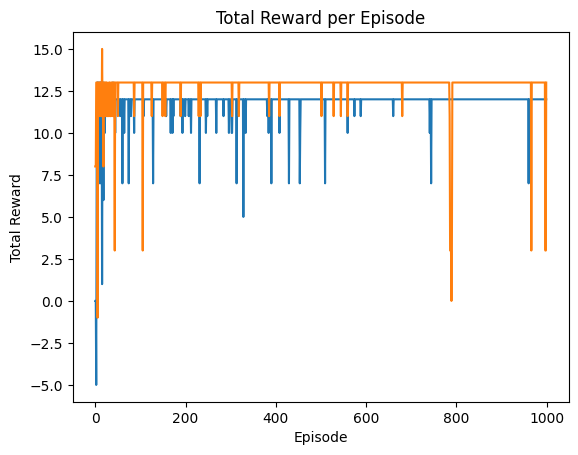

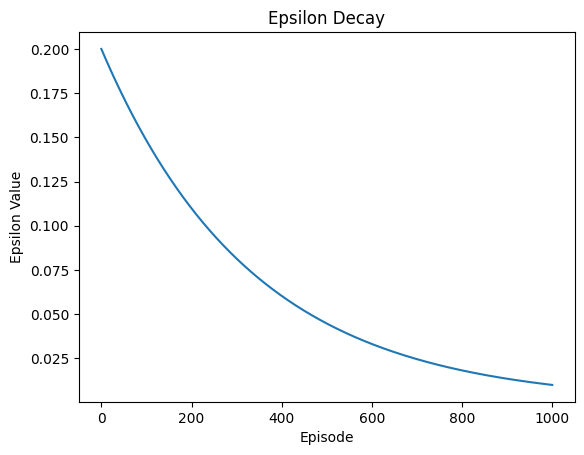

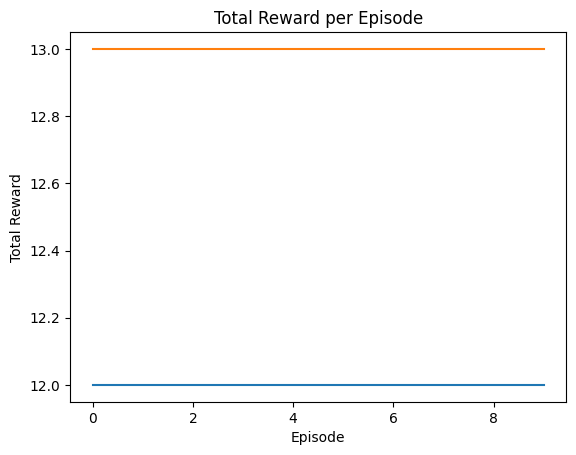

In [ ]:
# Hyperparameter 2: Epsilon value (make very small)
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 0.2 # start training with 1, have it decay to about 0.01
    numepisodes = 1000

    Q1,Q2=sarsa(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()

In [ ]:
def QLearning(a,g,e,num,env): # alpha, gamma, epsilon, number of episodes, environment
  # DO THIS TWICE ONCE FOR LEARNING AND ONCE FOR TESTING
  initialepsilon=e
  epsilon=e
  # print("initial epsilon: ",epsilon)
  Q1 = np.zeros((env.observation_space.n,env.action_space.n)) # initialize the Q table
  Q2 = np.zeros((env.observation_space.n,env.action_space.n))
  print("Initial Q Table For Agent 1:")
  print(Q1)
  print("Initial Q Table For Agent 2:")
  print(Q2)
  totalrewardsperepisode1=[] # use to keep track of the total reward for each episode
  totalrewardsperepisode2=[]
  epsilonovertime=[] # keep track of epsilon value to plot later
  epsilonovertime.append(initialepsilon)
  for episode in range(0,num): # loop through 500-700 episodes
    # print("training episode number: ",episode)
    totalreward1 = 0 # initialize the total reward to 0 for each episode
    totalreward2 = 0
    # learning phase takes random or greedy and testing only takes greedy
    obs, info = env.reset() # reset to the initial state for each episode?
    S=obs # current state
    for i in range(0,len(S)): # find what state agent 1 is in
      if S[i] == 2:
        Sint1 = i
        break
    for i in range(0,len(S)): # find what state agent 2 is in
      if S[i]==3:
        Sint2=i
        break

    terminated,truncated=False,False

    # choose an action from the current state from the policy derived in Q (epsilon-greedy) (if epsilon value is greater)
    while not terminated:

      if np.random.rand() < epsilon: # determine if we will choose a random action or a greedy action
          action1 = np.random.choice(env.action_space.n) # random action
          action2 = np.random.choice(env.action_space.n)
          # print("random action chosen: ",action)
      else:
        act1 = np.argmax(Q1[Sint1])
        act2 = np.argmax(Q2[Sint2])
        # print("greedy action taken: ",act)

        action1 = act1 # greedy action based on the maximum Q value in the row for the current state
        action2 = act2

      obs, reward1, reward2, terminated, truncated, info = env.step(action1,action2) # apply the action
      totalreward1 += reward1
      totalreward2 += reward2
      # print("totalreward in loop: ", totalreward)
      nextS = obs
      # print("nextS obs: ",nextS)
      for i in range(0,len(nextS)):
        if nextS[i] == 2: # find next state of agent 1
          nextSint1 = i
          break
      for i in range(0,len(nextS)):
        if nextS[i] == 3: # find next state of agent 2
          nextSint2 = i
          break

      #print("act: ",act)
      # print("reward: ",reward)
      # print("g:", g)
      # print("Q[Sint][action]: ",Q[Sint][action])
      Q1[Sint1][action1] = Q1[Sint1][action1] + a*(reward1 + g*np.max((Q1[nextSint1])) - Q1[Sint1][action1]) # update the Q value with the Q-Learning equation
      Q2[Sint2][action2] = Q2[Sint2][action2] + a*(reward2 + g*np.max((Q2[nextSint2])) - Q2[Sint2][action2])
      # print("Q[Sint][action] = Q[Sint][action] + a*(reward + g*Q[nextSint][nextaction] - Q[Sint][action])")
      # print("updated Q value: ",Q[Sint][action])
      # print("Current Q table: ",Q)
      S=nextS
      # print("S: ",S)
      for i in range(0,len(S)): # find what state agent 1 is in
        if S[i] == 2:
          Sint1 = i
          break
      for i in range(0,len(S)): # find what state agent 2 is in
        if S[i] == 3:
          Sint2 = i
          break
      # print("Sint: ",Sint)

      # print("action=nextaction: ",action)
    totalrewardsperepisode1.append(totalreward1)
    totalrewardsperepisode2.append(totalreward2)
    # print("totalrewardspepisodelist: ",totalrewardsperepisode)
    #epsilon decay rate
    decayfactor = (0.01/initialepsilon)**(1/num)
    epsilon = epsilon*decayfactor
    # print("new epsilon: ",epsilon)
    epsilonovertime.append(epsilon)

  print("Trained Q Table For Agent 1:")
  print(Q1)
  print("Trained Q Table for Agent 2:")
  print(Q2)
  # plot total reward per episode
  plt.plot(totalrewardsperepisode1,label='Agent 1')
  plt.plot(totalrewardsperepisode2,label='Agent 2')
  plt.xlabel("Episode")
  plt.ylabel("Total Reward")
  plt.title("Total Reward per Episode")
  plt.show()

  # plot epsilon decay graph
  plt.plot(epsilonovertime)
  plt.xlabel("Episode")
  plt.ylabel("Epsilon Value")
  plt.title("Epsilon Decay")
  plt.show()

  return Q1,Q2

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

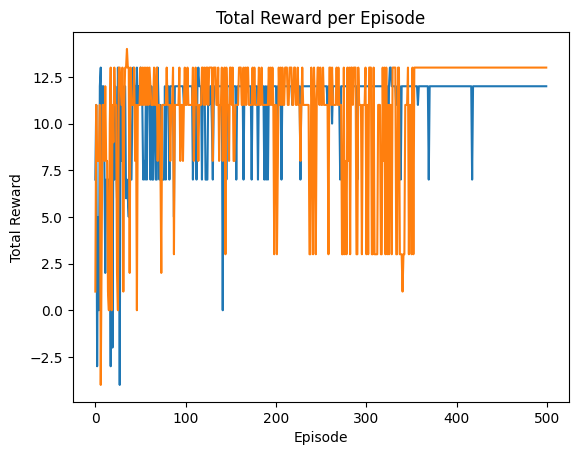

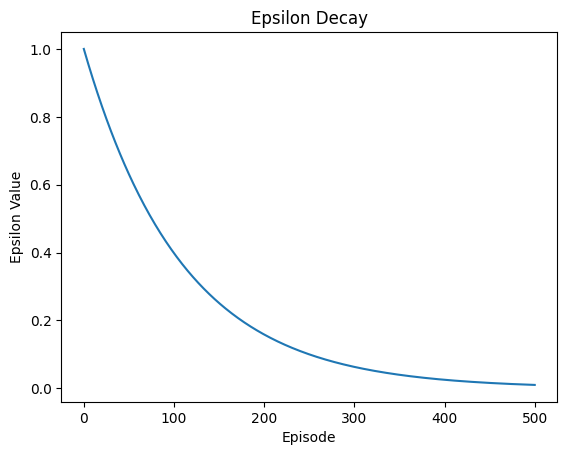

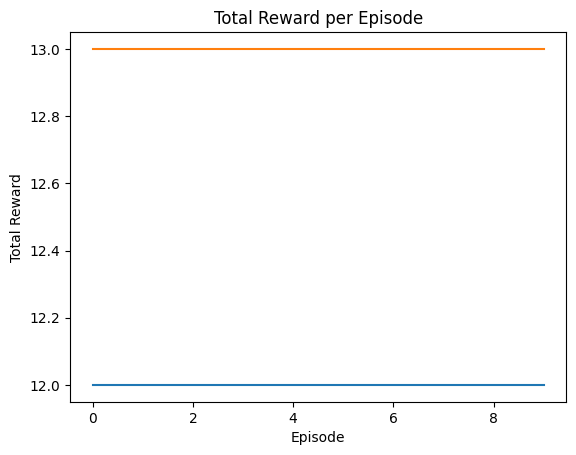

In [ ]:
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 1 # start training with 1, have it decay to about 0.01
    numepisodes = 500

    Q1,Q2=QLearning(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

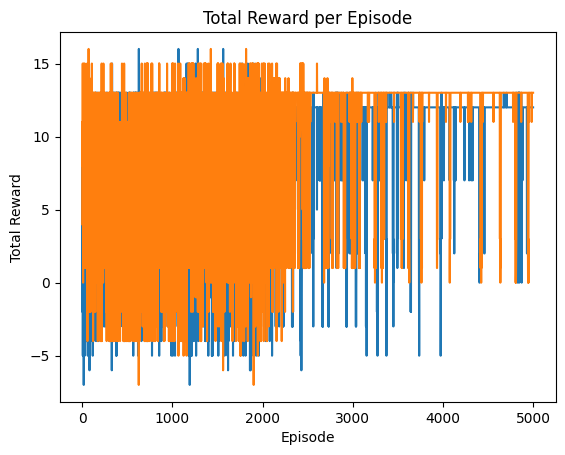

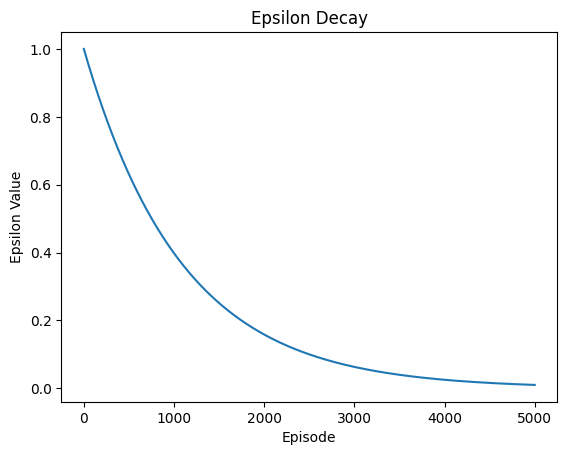

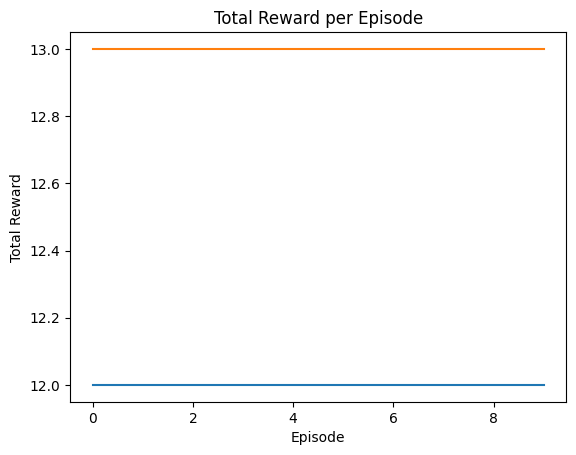

In [ ]:
# Hyperparameter 1: Number of Episodes (make very large)
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 1 # start training with 1, have it decay to about 0.01
    numepisodes = 5000

    Q1,Q2=QLearning(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

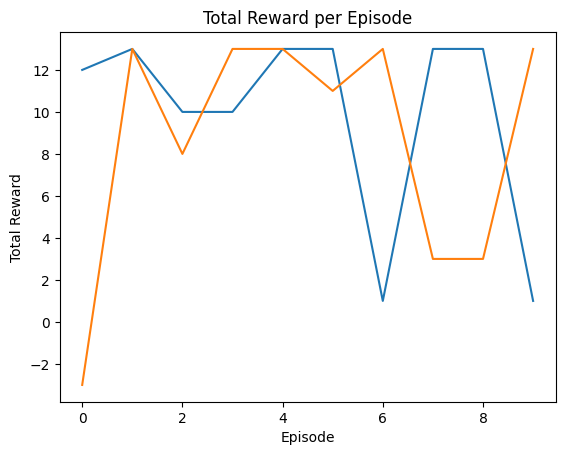

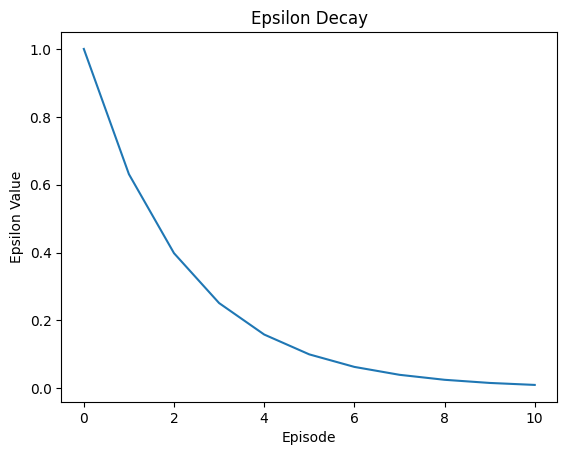

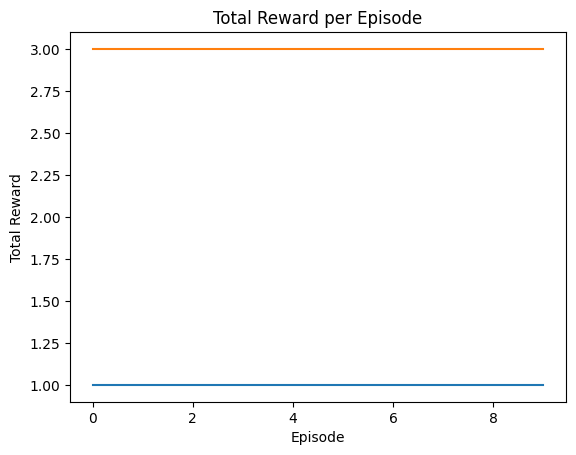

In [ ]:
# Hyperparameter 1: Number of Episodes (make very small)
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 1 # start training with 1, have it decay to about 0.01
    numepisodes = 10

    Q1,Q2=QLearning(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

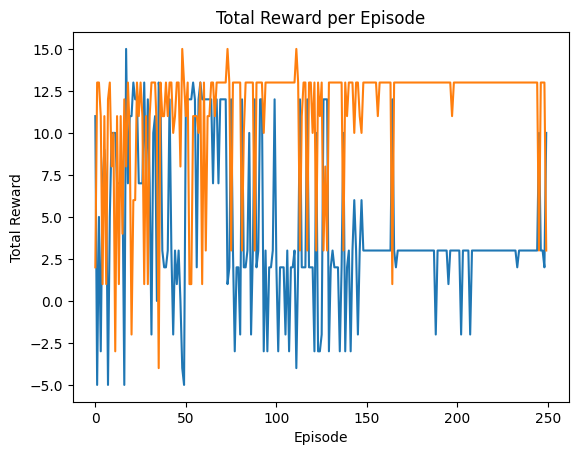

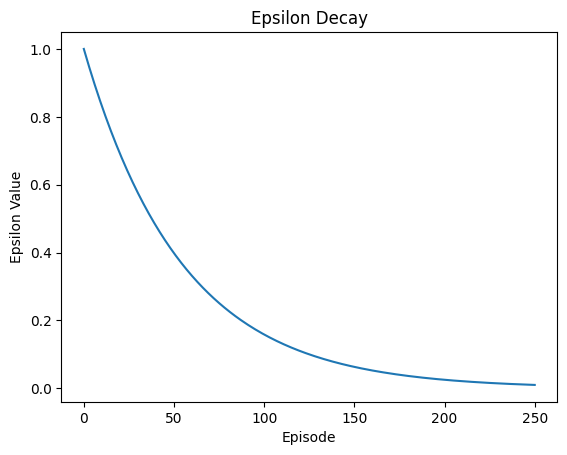

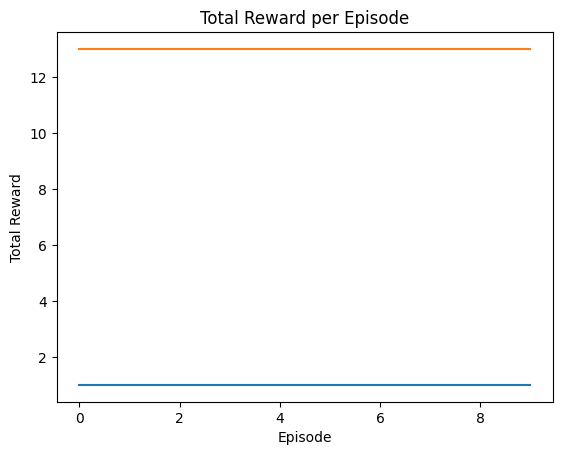

In [ ]:
# Hyperparameter 1: Number of Episodes (half of original)
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 1 # start training with 1, have it decay to about 0.01
    numepisodes = 250

    Q1,Q2=QLearning(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

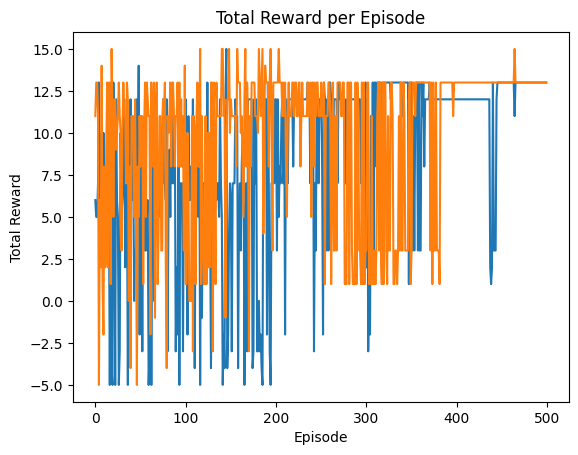

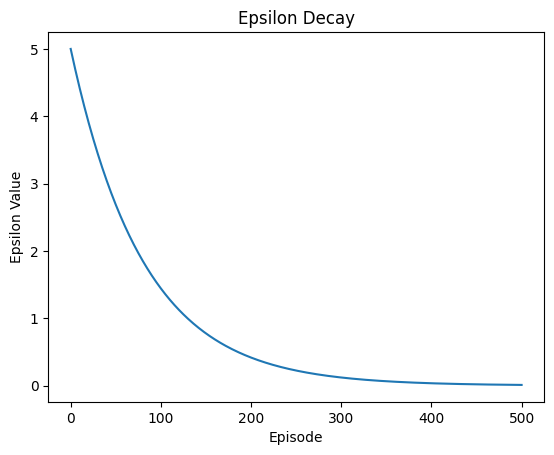

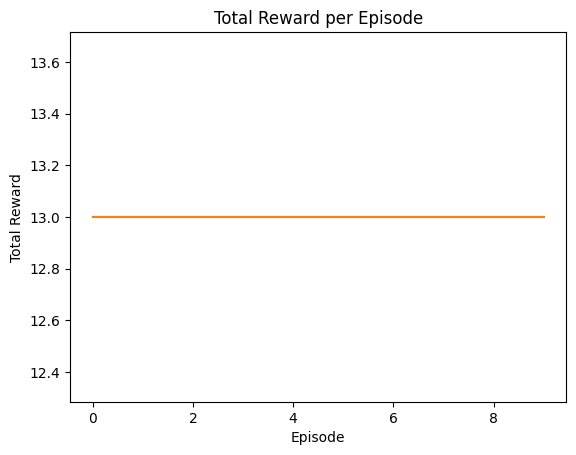

In [ ]:
# Hyperparameter 2: Epsilon (make very large)
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 5 # start training with 1, have it decay to about 0.01
    numepisodes = 500

    Q1,Q2=QLearning(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

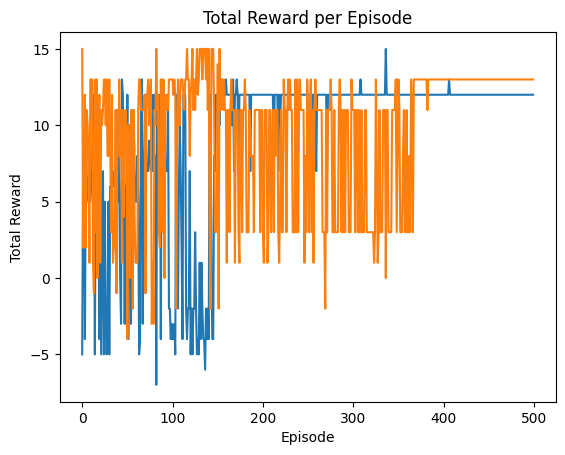

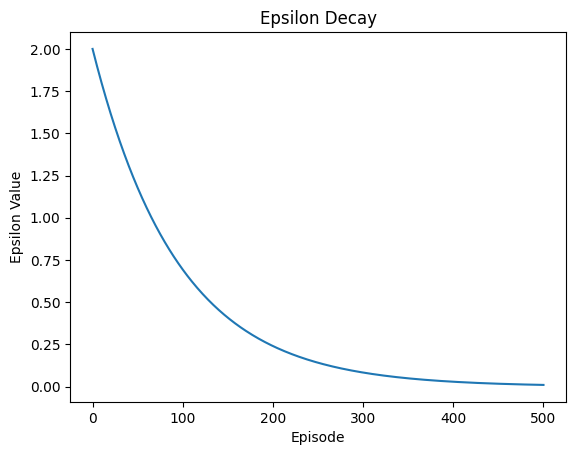

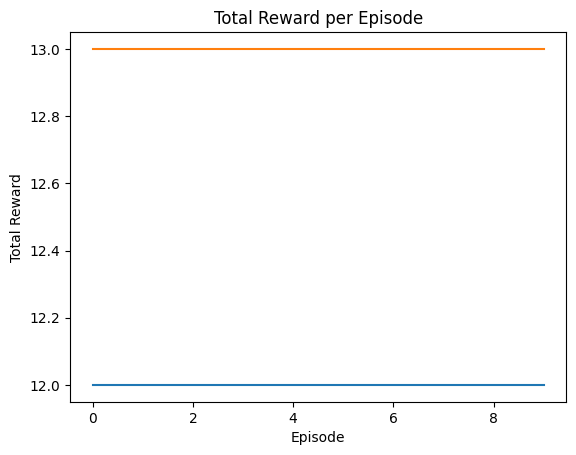

In [ ]:
# Hyperparameter 2: Epsilon (double original)
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 2 # start training with 1, have it decay to about 0.01
    numepisodes = 500

    Q1,Q2=QLearning(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()

Initial Q Table For Agent 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q Table For Agent 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 

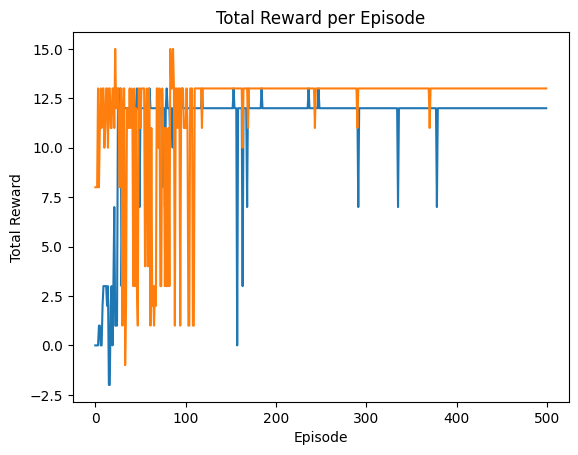

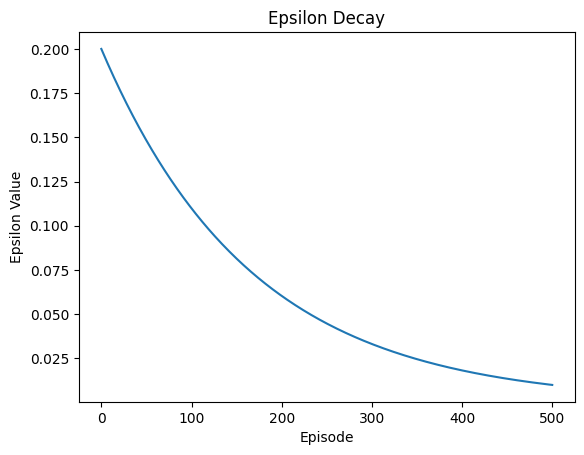

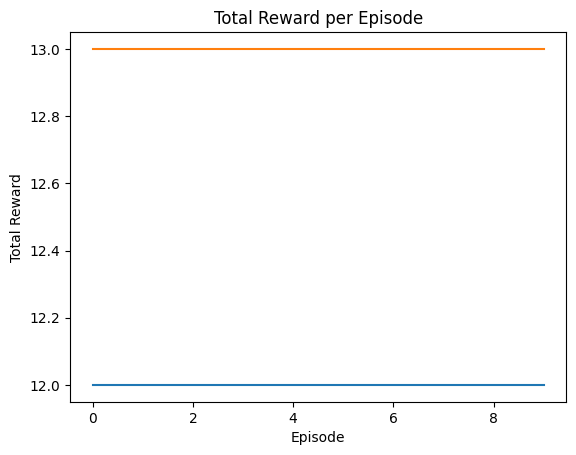

In [ ]:
# Hyperparameter 2: Epsilon (make very small)
if __name__ == '__main__':
    env = GridEnvironment()
    trainingagent1 = RandomAgent(env) # use random agent to train
    trainingagent2 = RandomAgent(env)
    alpha = 0.1
    gamma = 0.99
    epsilon = 0.2 # start training with 1, have it decay to about 0.01
    numepisodes = 500

    Q1,Q2=QLearning(alpha,gamma,epsilon,numepisodes,env)

    obs, info = env.reset()
    terminated, truncated = False, False

    testingagent1 = SarsaAgent1(Q1) # use the agent that chooses greedy actions for testing
    testingagent2 = SarsaAgent2(Q2)
    totalreward1=[]
    totalreward2=[]

    for i in range(0,10):
      obs, info = env.reset()
      terminated, truncated = False, False
      #env.render()
      totreward1=0
      totreward2=0
      steps=0
      while not terminated:
          action1 = testingagent1.step(obs)
          action2 = testingagent2.step(obs)
          # print("action: ",action)
          obs, reward1, reward2, terminated, truncated, info = env.step(action1, action2)
          # print("obs: ",obs)
          steps+=1
          # print("step: ",steps)
          totreward1+=reward1
          totreward2+=reward2
          #print('Action:', action, ', Reward:', reward, ', Done:', terminated)
          # print("Total reward this episode: ",totreward)
          # env.render()
      # print("Total number of steps: ",steps)
      totalreward1.append(totreward1)
      totalreward2.append(totreward2)
    # plot total reward per episode
    plt.plot(totalreward1,label='Agent 1 Rewards')
    plt.plot(totalreward2,label='Agent 2 Rewards')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Total Reward per Episode")
    plt.show()